In [1]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns #Need to install
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
from sklearn.cluster import KMeans as km
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso as LS
from sklearn.linear_model import Ridge as RG
from sklearn.tree import DecisionTreeRegressor as scart
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
crop_prod = pd.read_csv('apy.csv', delimiter=',')
crop_prod = crop_prod.fillna(0)
crop_prod.sort_values(by=crop_prod.columns[0], inplace=True)
states = sorted(set(crop_prod.iloc[:, 0].values))
print(crop_prod.head())

                      State_Name   District_Name  Crop_Year       Season  \
0    Andaman and Nicobar Islands        NICOBARS       2000  Kharif        
130  Andaman and Nicobar Islands  SOUTH ANDAMANS       2002  Whole Year    
131  Andaman and Nicobar Islands  SOUTH ANDAMANS       2002  Whole Year    
132  Andaman and Nicobar Islands  SOUTH ANDAMANS       2002  Whole Year    
133  Andaman and Nicobar Islands  SOUTH ANDAMANS       2002  Whole Year    

             Crop    Area  Production  
0        Arecanut  1254.0      2000.0  
130      Arecanut  3105.0      5267.0  
131        Banana  1524.0     10882.0  
132  Black pepper   487.0       102.5  
133     Cashewnut    81.0        24.0  


In [4]:
crop_price = pd.read_csv('Crops_price.csv', delimiter=',')

# Convert all columns except the first to numeric and fill any missing values with 0
for i in range(1, crop_price.shape[1]):
    crop_price.iloc[:, i] = pd.to_numeric(crop_price.iloc[:, i], errors='coerce').fillna(0)

# Rename the 'Commodities(rs/quin)' column to 'Commodities'
crop_price = crop_price.rename(columns={'Commodities(rs/quin)': 'Commodities'})

# Print the first few rows of the transformed DataFrame
print(crop_price.head())

          Commodities   2002   2004   2005   2006    2007    2008    2009  \
0     Paddy (Common)   550.0  560.0  570.0  580.0   645.0   850.0   950.0   
1  Paddy (Grade ‘A’)   580.0  590.0  600.0  610.0   675.0   880.0   980.0   
2              Wheat   630.0  640.0  650.0  750.0  1000.0  1080.0  1100.0   
3      Jowar (Hybrid)  490.0  515.0  525.0  540.0   600.0   840.0   840.0   
4    Jowar (Maldandi)    0.0    0.0    0.0  555.0   620.0   860.0   860.0   

     2010  2011    2012  
0  1000.0  1080  1250.0  
1  1030.0  1110  1280.0  
2  1120.0  1285  1350.0  
3   880.0   980  1500.0  
4   900.0  1000  1520.0  


In [5]:
area_cult=pd.read_csv("area_cult.csv",delimiter=',')
# print(sum(area_cult.isna()))
area_cult.head()

,Year,Rice,Jowar,Bajra,Maize,Ragi,Small millets,Wheat,Barley,Gram,...,Rubber,Banana,Sugarcane,Tobacco,Potato,Black pepper,Dry chillies,Ginger,Coconut,Turmeric
0,2000,44712,9856,9829,6611,1759,1424,25731,778,5185,...,400,459,4316,262,1222,214,836,86,1824,192
1,2001,44904,9795,9529,6582,1647,1310,26345,660,6416,...,401,489,4412,348,1208,219,880,91,1932,167
2,2002,41176,9300,7740,6635,1415,1201,25196,702,5906,...,408,460,4520,327,1345,224,827,88,1922,150
3,2003,42593,9331,10612,7343,1666,1191,26595,657,7048,...,428,391,3938,370,1289,233,774,85,1934,150
4,2004,41907,9092,8233,7430,1553,1101,26383,616,6715,...,440,404,3662,366,1318,228,738,95,1935,159


In [6]:
#checked for null values in the data and if there performing data cleaning
#Right now we dont have any of the null data in our data set so proceeding to the furthur steps.
print(sum(area_cult.isna()))

Year                 0
Rice                 0
Jowar                0
Bajra                0
Maize                0
Ragi                 0
Small millets        0
Wheat                0
Barley               0
Gram                 0
Arhar/Tur            0
Other Pulses         0
Pulses total         0
Total foodgrain      0
Groundnut            0
Sesamum              0
Rapeseed &Mustard    0
Linseed              0
Castor seed          0
Oilseeds total       0
Cotton(lint)         0
Jute                 0
Mesta                0
Tea                  0
Coffee               0
Rubber               0
Banana               0
Sugarcane            0
Tobacco              0
Potato               0
Black pepper         0
Dry chillies         0
Ginger               0
Coconut              0
Turmeric             0
dtype: int64


In [7]:
area_cult.head()

,Year,Rice,Jowar,Bajra,Maize,Ragi,Small millets,Wheat,Barley,Gram,...,Rubber,Banana,Sugarcane,Tobacco,Potato,Black pepper,Dry chillies,Ginger,Coconut,Turmeric
0,2000,44712,9856,9829,6611,1759,1424,25731,778,5185,...,400,459,4316,262,1222,214,836,86,1824,192
1,2001,44904,9795,9529,6582,1647,1310,26345,660,6416,...,401,489,4412,348,1208,219,880,91,1932,167
2,2002,41176,9300,7740,6635,1415,1201,25196,702,5906,...,408,460,4520,327,1345,224,827,88,1922,150
3,2003,42593,9331,10612,7343,1666,1191,26595,657,7048,...,428,391,3938,370,1289,233,774,85,1934,150
4,2004,41907,9092,8233,7430,1553,1101,26383,616,6715,...,440,404,3662,366,1318,228,738,95,1935,159


In [8]:
culti_cost = pd.read_csv('culti_cost.csv', delimiter=',')

# Fill any missing values with 0
culti_cost = culti_cost.fillna(0)

# Get a sorted list of states
state_cult = sorted(set(culti_cost.iloc[:, 1]))

# Print the shape of the DataFrame and the first few rows
print(culti_cost.shape)
print(culti_cost.head())

(50, 20)
    Crop  State/ UT Name  Cost of Cultivation (`/Hectare) - A2+FL - 2008-09  \
0  Paddy  Andhra Pradesh                                           29664.84   
1  Paddy          Odisha                                           17478.05   
2  Paddy          Punjab                                           25154.75   
3  Paddy   Uttar Pradesh                                           17022.00   
4  Paddy     West Bengal                                           24731.06   

   Cost of Cultivation (`/Hectare) - A2+FL - 2009-10  \
0                                           35104.80   
1                                           19175.75   
2                                           29031.73   
3                                           21336.61   
4                                           28101.85   

   Cost of Cultivation (`/Hectare) - A2+FL - 2010-11  \
0                                           35090.78   
1                                           21894.98   
2          

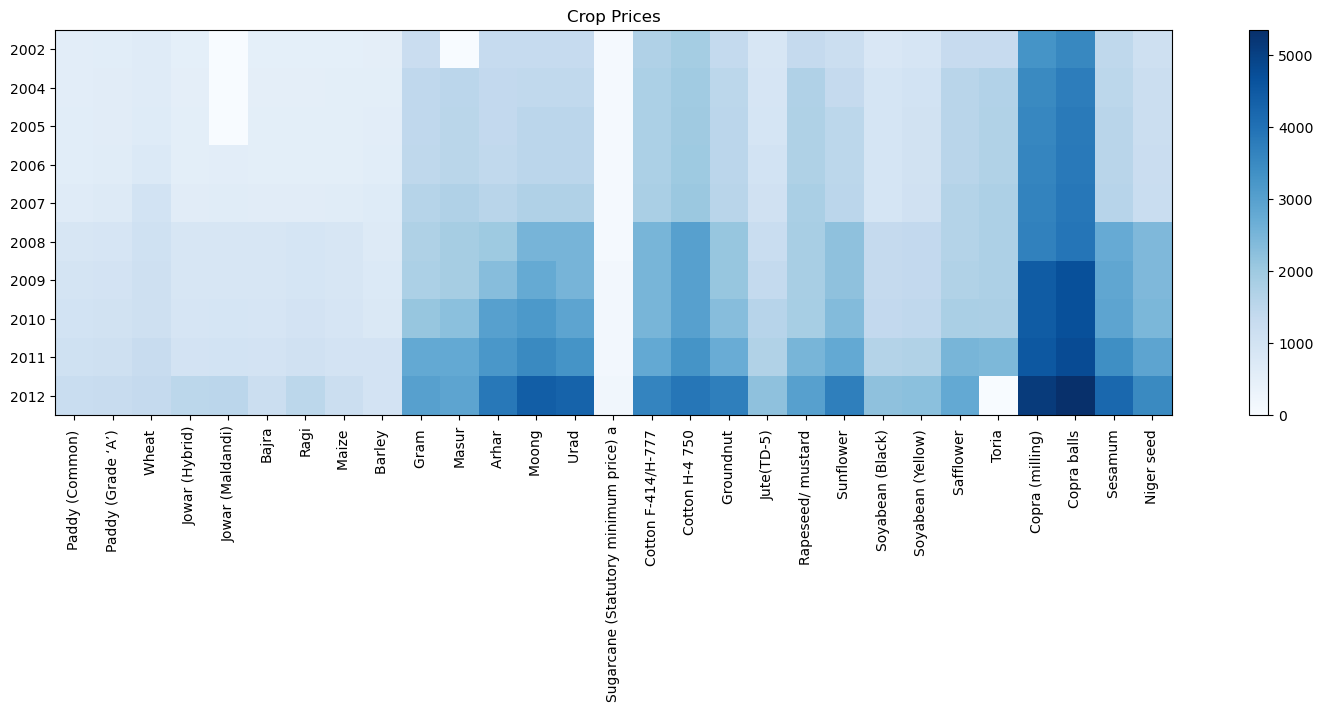

In [9]:
mat1 = np.matrix(crop_price.values[:, 1:], dtype='float')

# Create a figure and subplot with a specific size
fig, ax = plt.subplots(num=2, figsize=(20, 5))

# Plot the matrix as an image with a blue colormap
im = ax.imshow(mat1.T, cmap='Blues')

# Set the y-ticks to the names of the crops
ax.set_yticks(np.arange(len(crop_price.columns[1:])))
ax.set_yticklabels(crop_price.columns[1:])

# Set the x-ticks to the names of the states, with vertical rotation for readability
ax.set_xticks(np.arange(len(crop_price.iloc[:, 0])))
ax.set_xticklabels(crop_price.iloc[:, 0], rotation='vertical')

# Add a colorbar and a title to the plot
plt.colorbar(im)
plt.title('Crop Prices')

# Show the plot
plt.show()

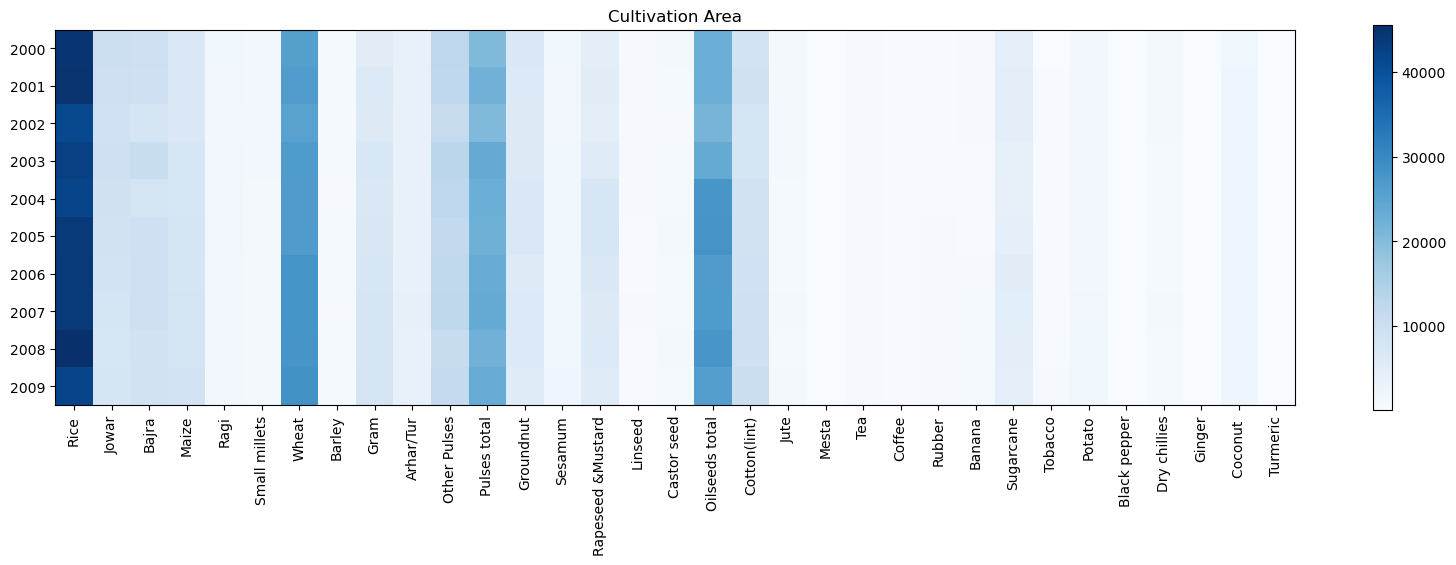

In [10]:
# Create a matrix from the values of the area_cult DataFrame, excluding the first column
mat2 = np.matrix(area_cult.values[:, 1:], dtype='float')

# Delete the 12th column of the matrix, which corresponds to the total area
mat2 = np.delete(mat2, 12, 1)

# Create a figure and subplot with a specific size
fig, ax = plt.subplots(num=3, figsize=(20, 5))

# Set the x-ticks to the names of the crops, excluding the total area column
ax.set_xticks(np.arange(len(np.delete(area_cult.columns[1:], 12))))
ax.set_xticklabels(np.delete(area_cult.columns[1:], 12), rotation='vertical')

# Set the y-ticks to the names of the states
ax.set_yticks(np.arange(len(area_cult.iloc[:, 0])))
ax.set_yticklabels(area_cult.iloc[:, 0])

# Plot the matrix as an image with a blue colormap
im = ax.imshow(mat2, cmap='Blues')

# Add a colorbar and a title to the plot
plt.colorbar(im)
plt.title('Cultivation Area')

# Show the plot
plt.show()

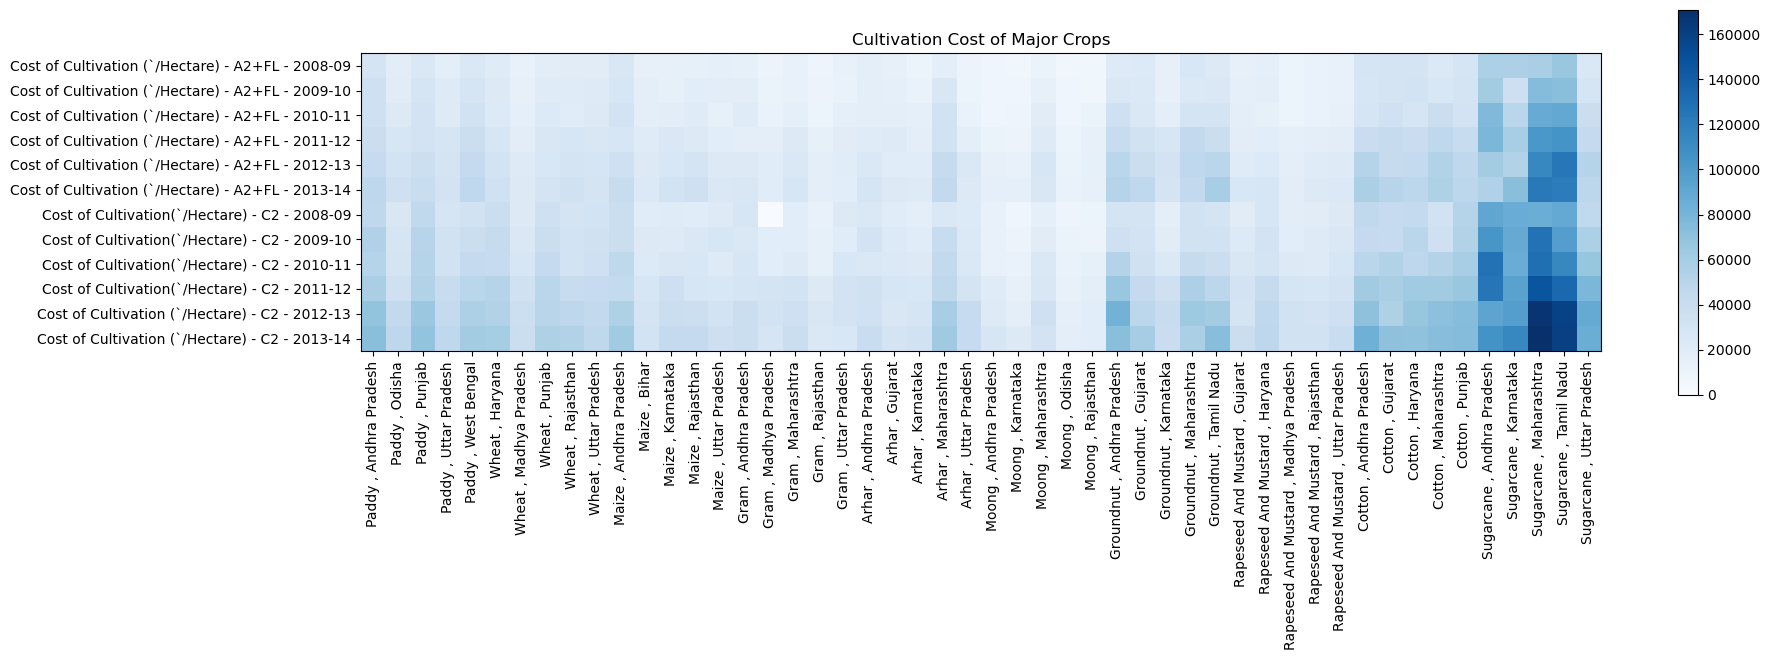

In [11]:
mat3 = np.matrix(culti_cost.values[:, 2:14], dtype='float').T

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_yticks(np.arange(len(culti_cost.columns[2:14])))
ax.set_xticks(np.arange(len(culti_cost.values[:, 0] + ' , ' + culti_cost.values[:, 1])))
ax.set_yticklabels(culti_cost.columns[2:14])
ax.set_xticklabels(culti_cost.values[:, 0] + ' , ' + culti_cost.values[:, 1], rotation='vertical')

plt.imshow(mat3, cmap='Blues')
plt.colorbar()
plt.title('Cultivation Cost of Major Crops')
plt.show()


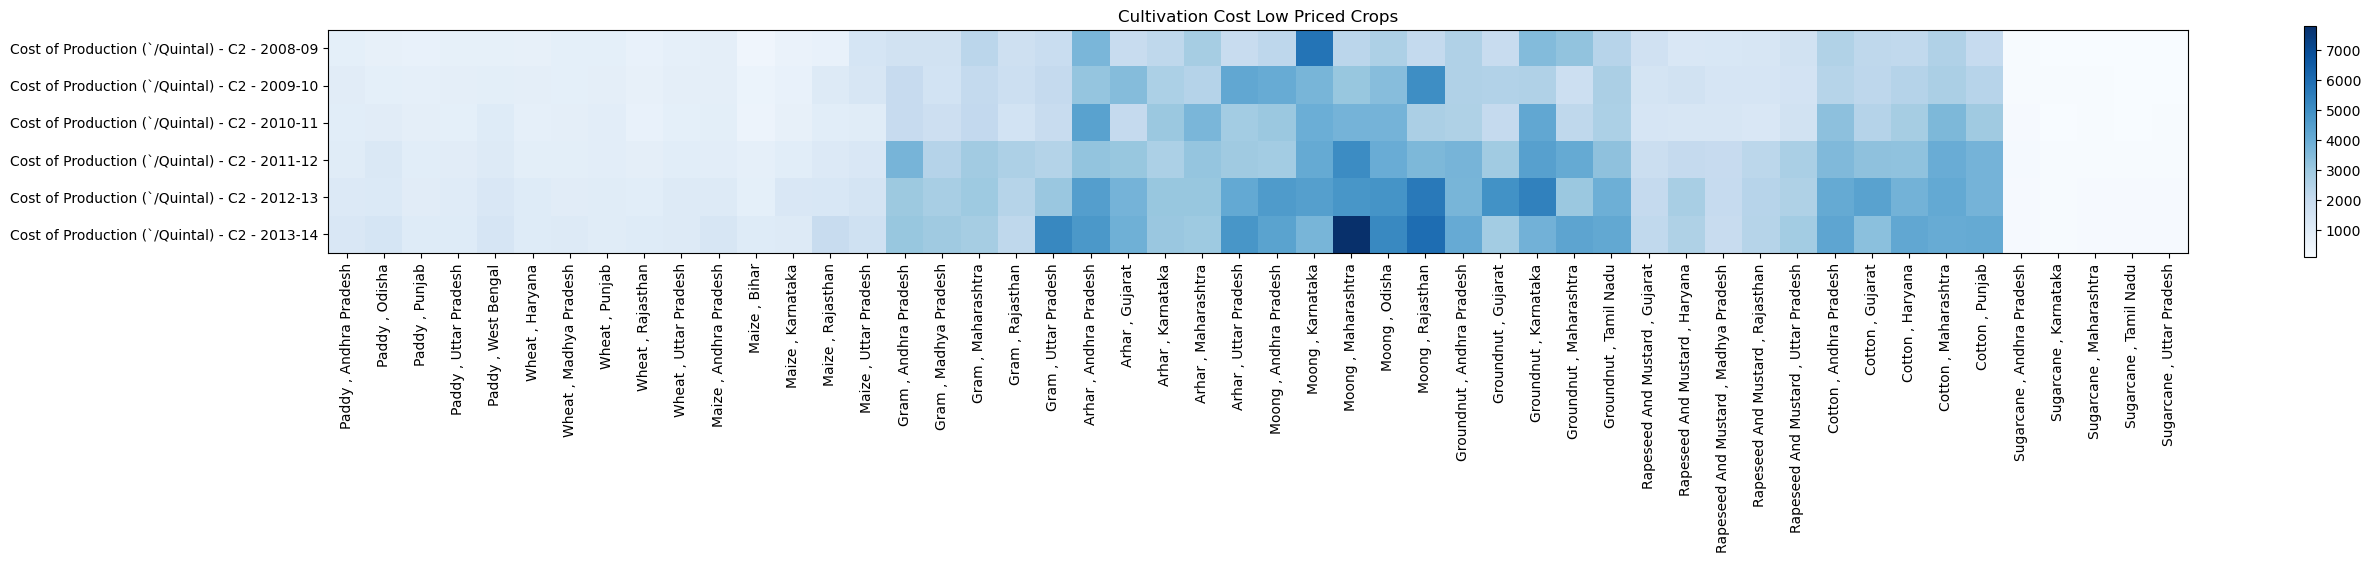

In [13]:
mat4 = np.matrix(culti_cost.values[:,14:],dtype='float').T

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(30,3))

# Set tick labels and positions
ax.set_yticks(np.arange(len(culti_cost.columns[14:])))
ax.set_xticks(np.arange(len(culti_cost.values[:,0]+' , '+culti_cost.values[:,1])))
ax.set_yticklabels(culti_cost.columns[14:])
ax.set_xticklabels(culti_cost.values[:,0]+' , '+culti_cost.values[:,1],rotation='vertical')

# Display image plot with colorbar and title
im = ax.imshow(mat4, cmap='Blues')
cbar = fig.colorbar(im)
ax.set_title('Cultivation Cost Low Priced Crops')

# Show the plot
plt.show()


In [14]:
temperature = pd.read_csv('Mean_Temperatures.csv',delimiter=',')
temperature.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,2000,24.60,19.33,26.47,27.23,22.68
1,2001,24.73,19.75,26.82,27.47,22.52
2,2002,25.00,19.65,27.22,27.71,22.58
3,2003,24.72,19.82,26.52,27.64,22.23
4,2004,24.74,19.93,27.06,27.33,22.24


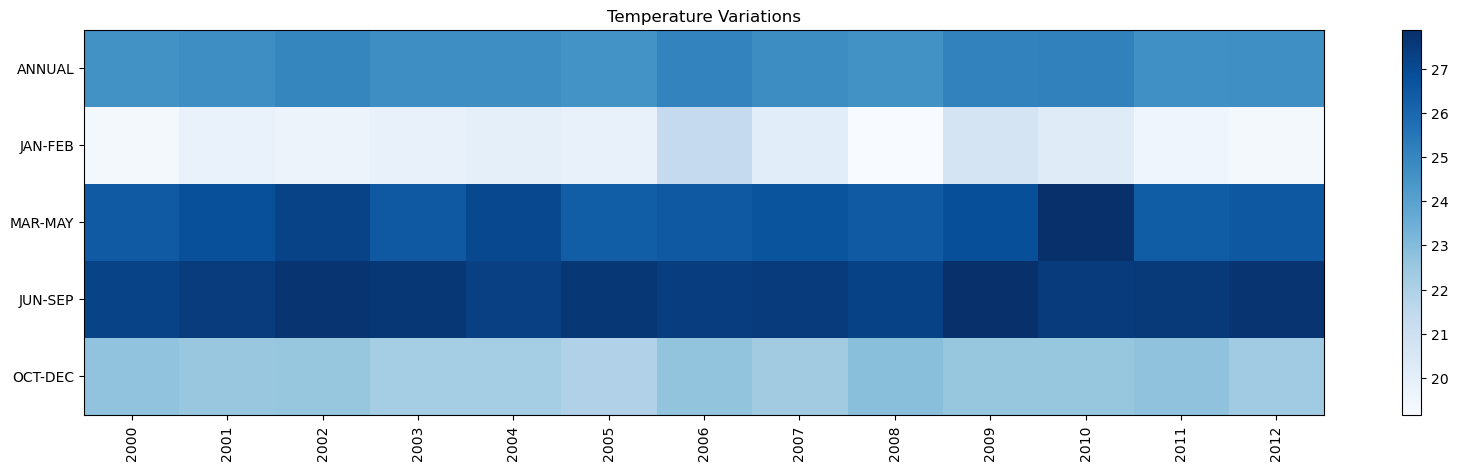

In [15]:
mat5 = np.matrix(temperature.values[:,1:],dtype='float').T
fig, ax = plt.subplots(figsize=(20,5))
im = ax.imshow(mat5, cmap='Blues', aspect='auto')
ax.set_xticks(np.arange(len(temperature.values[:,0])))
ax.set_xticklabels(temperature.values[:,0].astype(int), rotation='vertical')
ax.set_yticks(np.arange(len(temperature.columns[1:])))
ax.set_yticklabels(temperature.columns[1:])
plt.colorbar(im)
plt.title('Temperature Variations')
plt.show()


In [16]:
rainfall =  pd.read_csv('rainfall_cleaned.csv',delimiter=',')
rainfall.head()

,STATES,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2
1,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9
2,ANDAMAN & NICOBAR ISLANDS,2002,10.6,0.0,11.5,100.2,366.7,358.3,317.4,429.8,420.0,169.0,306.7,129.9,2620.2
3,ANDAMAN & NICOBAR ISLANDS,2003,44.3,7.9,149.2,19.4,296.3,159.9,494.9,379.4,371.9,310.4,74.1,48.0,2355.9
4,ANDAMAN & NICOBAR ISLANDS,2004,54.5,35.9,36.5,41.6,505.1,423.9,378.9,308.7,280.7,223.9,169.9,0.4,2460.1


In [23]:
rainfall1=rainfall.copy()
rainfall1 = rainfall1.groupby(['STATES','YEAR'],as_index=True).mean()

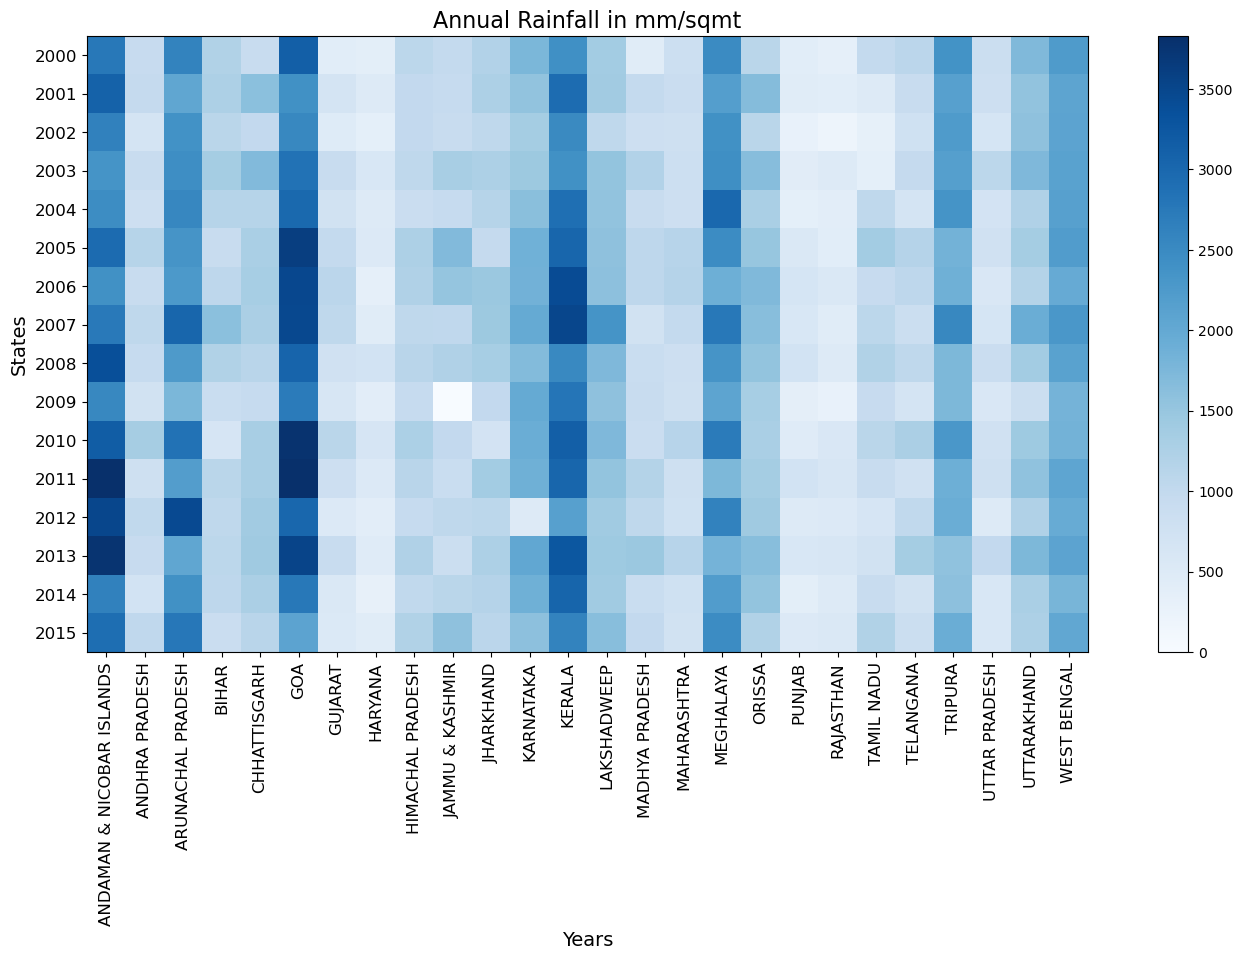

In [24]:
mat6 = np.matrix(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,1:],dtype='float').T
fig, ax = plt.subplots(figsize=(18,8))
im = ax.imshow(mat6, cmap='Blues')
ax.set_xticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0])))
ax.set_yticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])))
ax.set_xticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0],rotation='vertical')
ax.set_yticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.xlabel('Years', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.title('Annual Rainfall in mm/sqmt', fontsize=16)
plt.colorbar(im)
plt.show()


In [25]:
# Load the dataset
suicides = pd.read_csv('suicides_10-14.csv', usecols=lambda x: x not in ['Sl. No.', '2014 - Labourers'])

# Drop rows with any missing values
suicides.dropna(inplace=True)

# Fill remaining missing values with 0
suicides.fillna(0, inplace=True)

# Preview the cleaned dataset
suicides.head()


,State/UT,2010,2011,2012,2013,2014
0,ANDHRA PRADESH,2525.0,2206.0,2572.0,2014.0,160
1,ARUNACHAL PRADESH,18.0,13.0,11.0,37.0,0
2,ASSAM,369.0,312.0,344.0,305.0,21
3,BIHAR,95.0,83.0,68.0,127.0,0
4,CHHATTISGARH,1126.0,0.0,4.0,0.0,443


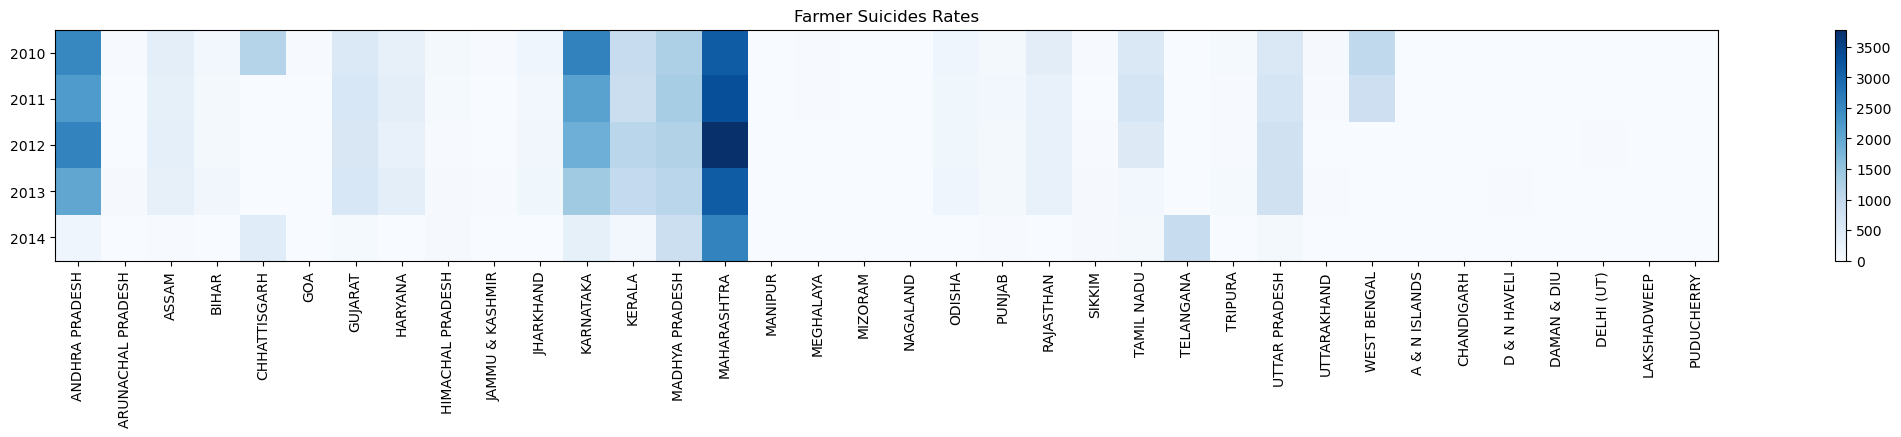

In [26]:
# Import the suicides_10-14.csv file as a pandas DataFrame
suicides = pd.read_csv('suicides_10-14.csv', delimiter=',')

# Remove unwanted columns
suicides.drop(columns=['Sl. No.', '2014 - Labourers'], inplace=True)

# Replace any missing values with 0
suicides.fillna(0, inplace=True)

# Transpose the DataFrame and create a matrix from its values
mat8 = np.matrix(suicides.values[:,1:], dtype='float').T

# Create a figure with a single subplot
fig, ax = plt.subplots(num=5, figsize=(30,3))

# Set the y and x tick labels and positions
ax.set_yticks(np.arange(len(suicides.columns[1:])))
ax.set_xticks(np.arange(len(suicides.values[:,0])))
ax.set_yticklabels(suicides.columns[1:])
ax.set_xticklabels(suicides.values[:,0], rotation='vertical')

# Display the matrix as an image
plt.imshow(mat8, cmap='Blues')
plt.colorbar()
plt.title('Farmer Suicides Rates')
plt.show()


In [27]:
# Load data from CSV file
exports = pd.read_csv('indiaExport.csv', delimiter=',')

# Drop columns containing 'Unn'
to_drop = [head for head in exports.columns[1:] if 'Unn' in head]
exports.drop(columns=to_drop, inplace=True)

# Drop the first row
exports = exports.drop(0)

# Rename the first column to 'Product'
exports.rename(columns={'Unnamed: 0': 'Product'}, inplace=True)

# Make a copy for plotting
for_plot = exports.copy()

# Melt the dataframe to long format
exports = exports.melt(id_vars='Product')
exports.variable = exports.variable.astype(int)
exports.value = exports.value.astype(float)

# Print the first few rows
exports.head()


,Product,variable,value
0,Buffalo Meat,2003,343817.08
1,Basmati Rice,2003,771475.37
2,Rice,2003,2640438.93
3,Guargum,2003,120561.27
4,Wheat,2003,4093080.52


In [29]:
plot_exports=for_plot.copy()
plot_exports=plot_exports.reset_index(drop=True)
to_drop=[]
ct=0
for head in plot_exports.Product:
    if 'Meat' in head:
        to_drop.append(head)
        plot_exports.drop(ct,inplace=True)
    ct+=1
plot_exports.drop([9,15,23,26,29,32],inplace=True)
plot_exports = plot_exports.reset_index(drop=True)
plot_exports.Product[plot_exports.Product=='Cucumber and Gherkins( Prepd. & Presvd)'] = 'Cucumber and Gherkins'
plot_exports.head()

,Product,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Basmati Rice,771475.37,1162989.16,1166562.79,1045714.95,1183355.73,1556411.06,2016775,2370658.39,3178174.43,3459898.93,3757271.42,3702260.07
1,Rice,2640438.93,3615109.55,2921601.91,3702191.99,5285916.33,931879.8,139540.76,100685.78,3997719.57,6687990.85,7133183.37,8274046.02
2,Guargum,120561.27,131299.98,186718.4,189304.36,211166.56,258567.56,218479.74,441607.7,707326.43,406311.81,601945.42,665177.71
3,Wheat,4093080.52,2009343.03,746173.23,46633.21,237.27,1120.52,47.3,394.47,740746.76,6514810.6,5562374.74,2924070.18
4,Groundnuts,176109.32,177154.08,190053.34,251428.65,269587.64,297890.37,340246.31,433753.23,832616.93,535637.36,509664.84,708386.26


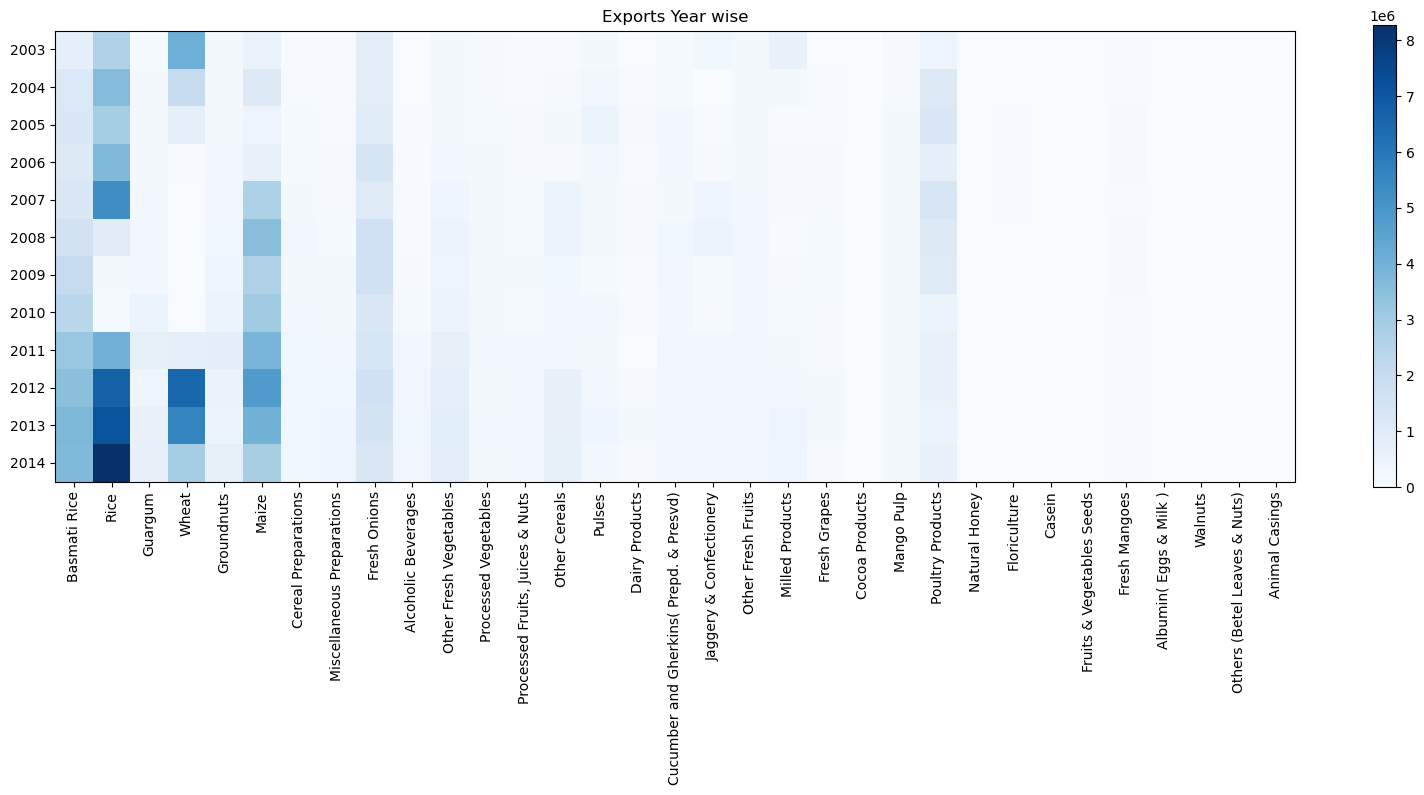

In [34]:
mat8 = np.matrix(plot_exports.values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(20,6))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(plot_exports.columns[1:])))
ax.set_xticks(np.arange(len(plot_exports.values[:,0])))
ax.set_yticklabels(plot_exports.columns[1:])
ax.set_xticklabels(plot_exports.values[:,0],rotation='vertical')
plt.imshow(mat8, cmap='Blues')
plt.colorbar()
plt.title('Exports Year wise')
plt.show()

In [36]:
area = (crop_prod[crop_prod['Crop_Year'] >= 2000]
        .drop(columns='Production')
        .groupby(['State_Name', 'Crop_Year', 'Crop'], as_index=False, sort=False)
        .sum())
area.head()

,State_Name,Crop_Year,Crop,Area
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0
1,Andaman and Nicobar Islands,2002,Arecanut,4363.0
2,Andaman and Nicobar Islands,2002,Banana,1737.0
3,Andaman and Nicobar Islands,2002,Black pepper,550.0
4,Andaman and Nicobar Islands,2002,Cashewnut,800.0


In [37]:
production = (crop_prod.iloc[:, [0, 1, 2, 3, 4, 6]]
              .query('Crop_Year >= 2000')
              .groupby(['State_Name', 'Crop_Year', 'Crop'], as_index=False, sort=False)
              .sum()
              .replace({'Crop': {'Paddy': 'Rice', 'Moong(Green Gram)': 'Moong'}}))
production.head()

,State_Name,Crop_Year,Crop,Production
0,Andaman and Nicobar Islands,2000,Arecanut,7200.0
1,Andaman and Nicobar Islands,2002,Arecanut,7350.0
2,Andaman and Nicobar Islands,2002,Banana,12160.0
3,Andaman and Nicobar Islands,2002,Black pepper,116.0
4,Andaman and Nicobar Islands,2002,Cashewnut,232.0


In [38]:
area.replace({'Crop': {'Paddy': 'Rice', 'Moong(Green Gram)': 'Moong'}}, inplace=True)

crop_price = crop_price.copy()
crop_price.replace({'Commodities': {'Paddy': 'Rice', 'Cotton F-414/H-777 ': 'Cotton(lint)', 'Cotton H-4 750 ': 'Cotton(lint)'}}, inplace=True)

list_area = sorted(area['Crop'].unique())
list_price = sorted(crop_price['Commodities'].unique())

for item in list_price:
    if 'Paddy' in item:
        crop_price['Commodities'] = crop_price['Commodities'].replace(item, 'Rice')
    for item_area in list_area:
        if item.strip() in item_area or item_area.strip() in item:
            if item != item_area:
                crop_price['Commodities'] = crop_price['Commodities'].replace(item, item_area)

crop_price = crop_price.groupby(['Commodities'], as_index=False, sort=False).sum()


In [39]:
# performing data conversion to make it use for visualization.
area_price = area.iloc[:, 1:].groupby(['Crop_Year', 'Crop'], as_index=True, sort=False).sum()
area_price = area_price.unstack(level=0).reset_index()
area_price = area_price.fillna(0)
area_price.columns = area_price.columns.droplevel()
area_price = area_price.rename(columns={'': 'Crop'}).sort_values(by='Crop')
cols_to_drop = [2000, 2001, 2003, 2013, 2014, 2015]
area_price = area_price.drop(cols_to_drop, axis=1)
area_price.columns = area_price.columns.astype(str)
area_price = area_price.reindex(sorted(area_price.columns), axis=1)
area_price.head()


Crop_Year,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,Crop
114,4.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,Apple
88,144116.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,Arcanut (Processed)
0,189845.00,281066.37,370899.45,386009.00,357428.00,378137.0,383463.0,399306.5,411994.36,407082.0,Arecanut
13,2963889.15,2912104.08,2875328.46,3297134.83,2287957.63,3113224.0,3221594.0,4289565.0,3752892.00,3220916.0,Arhar/Tur
111,744.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,Ash Gourd


In [40]:
# Selecting the names of crops that are present in both area_price and crop_price table
crop_price = crop_price[crop_price['Commodities'].isin(area_price.Crop)].sort_values(by='Commodities')
crop_price.head()

,Commodities,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
9,Arhar/Tur,1325.0,1390.0,1400.0,1410.0,1550.0,2000.0,2300.0,3000.0,3200,3850.0
3,Bajra,495.0,515.0,525.0,540.0,600.0,840.0,840.0,880.0,980,1175.0
6,Barley,505.0,540.0,550.0,565.0,650.0,680.0,750.0,780.0,980,980.0
13,Cotton(lint),3590.0,3720.0,3740.0,3760.0,3830.0,5500.0,5500.0,5500.0,6100,7500.0
7,Gram,1225.0,1425.0,1435.0,1445.0,1600.0,1730.0,1760.0,2100.0,2800,3000.0


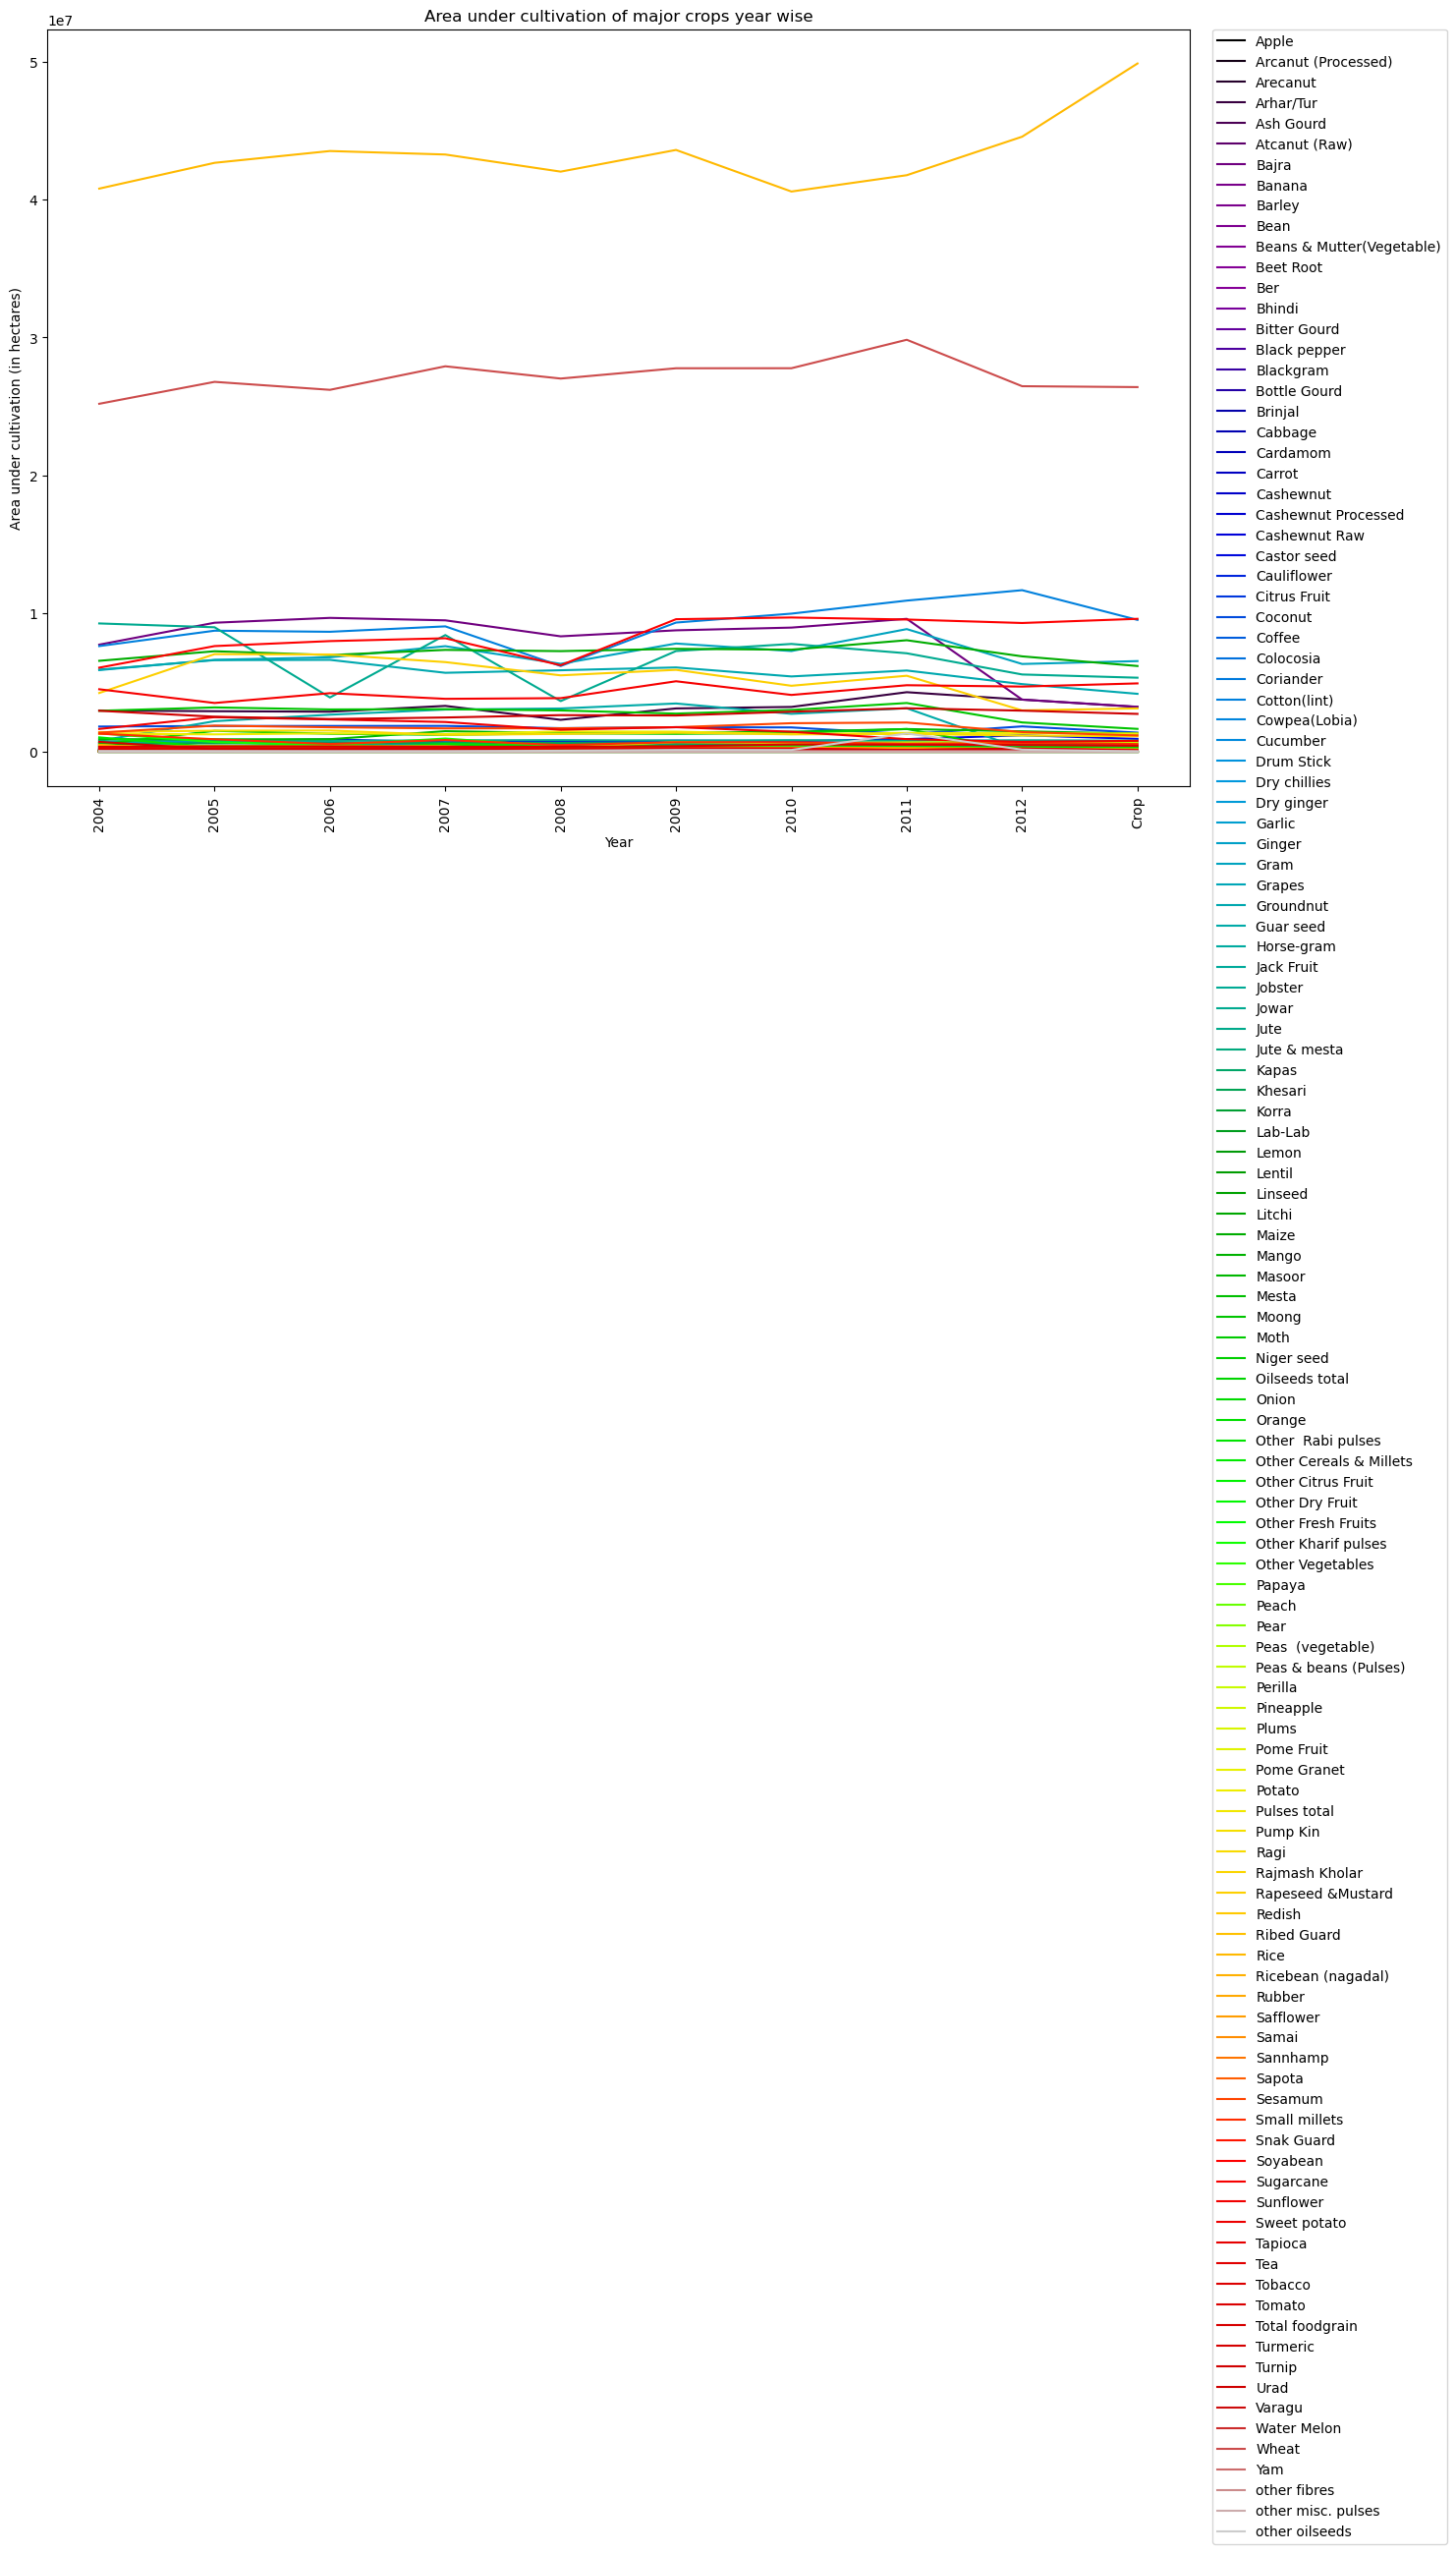

In [41]:
years = area_price.columns[1:]

fig, ax = plt.subplots(figsize=(15, 10))
colormap = plt.cm.nipy_spectral
ax.set_prop_cycle(color=[colormap(i) for i in np.linspace(0, 1, area_price.shape[0])])

for i in range(area_price.shape[0]):
    ax.plot(area_price.columns[:area_price.shape[1]-1], area_price.iloc[i,:area_price.shape[1]-1], label=area_price.iloc[i, -1])

ax.legend(bbox_to_anchor=(1.02,1), borderaxespad=0)
ax.set_title('Area under cultivation of major crops year wise')
ax.set_xticks(np.arange(len(years)))
ax.set_xticklabels(years, rotation='vertical')
ax.set_xlabel('Year')
ax.set_ylabel('Area under cultivation (in hectares)')

plt.show()

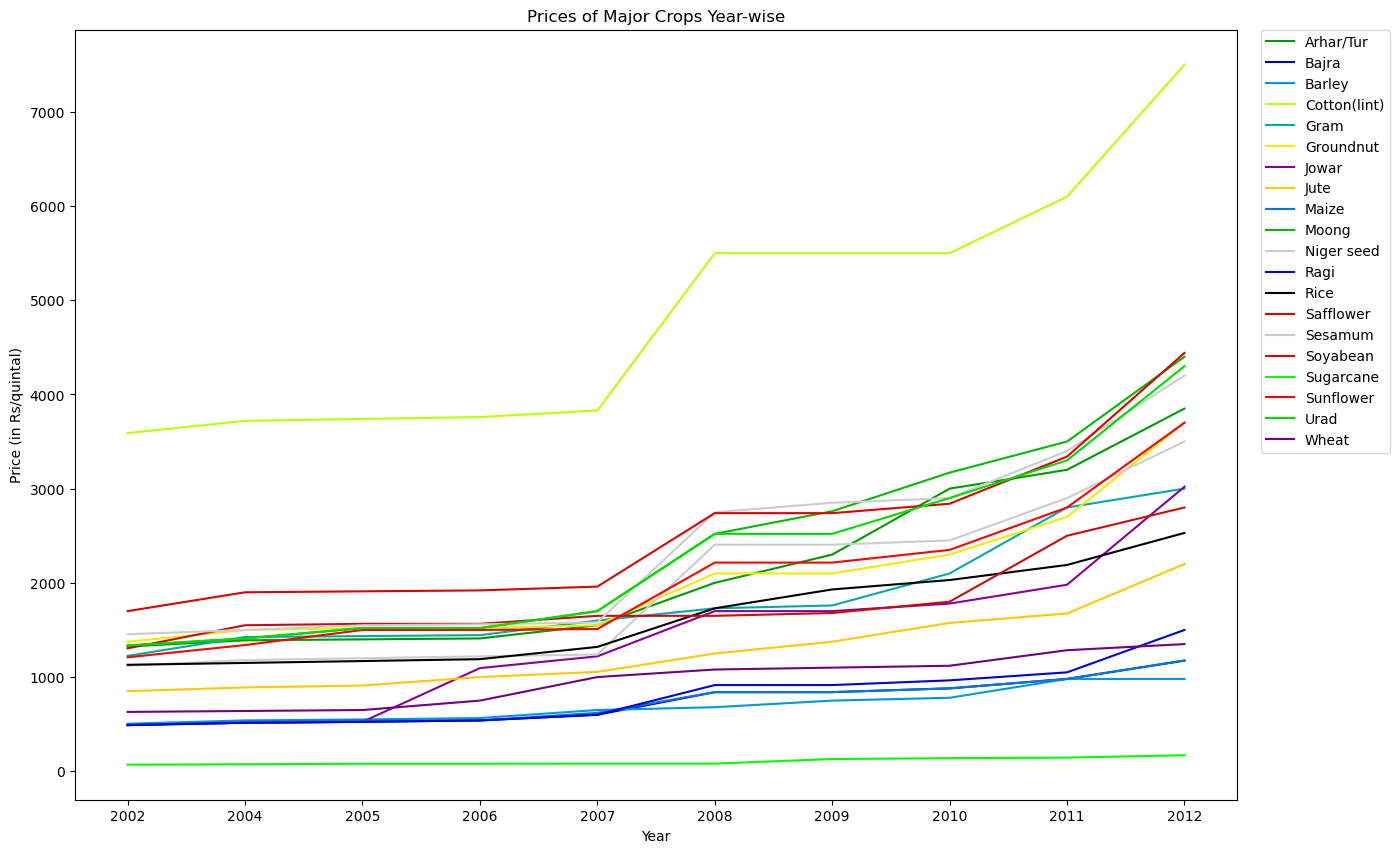

In [42]:
years = crop_price.columns[1:]
fig, ax = plt.subplots(figsize=(15, 10))
colormap = plt.cm.nipy_spectral
for i, row in crop_price.iterrows():
    ax.plot(years, row[1:], label=row[0], color=colormap(i/len(crop_price)))
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
ax.set_title('Prices of Major Crops Year-wise')
ax.set_xlabel('Year')
ax.set_ylabel('Price (in Rs/quintal)')
plt.show()


In [45]:
# Select relevant columns from production dataframe
production_year = production[['Crop_Year', 'Crop', 'Production']]

# Group data by year and crop, and compute sum of production
production_year = production_year.groupby(['Crop_Year', 'Crop'], as_index=False)['Production'].sum()

# Reshape data to have years as columns and crops as rows
production_year = production_year.pivot(index='Crop', columns='Crop_Year', values='Production')

# Replace missing values with 0
production_year.fillna(0, inplace=True)

# Keep only rows for crops that are also in crop_price dataframe
production_year = production_year.loc[production_year.index.isin(crop_price['Commodities'])]

# Drop columns for years that are not needed
production_year.drop(columns=[2000, 2001, 2003, 2013, 2014, 2015], inplace=True)

# Rename columns to have string data type
production_year.columns = production_year.columns.astype(str)

# Sort columns in ascending order
production_year = production_year[sorted(production_year.columns)]

# Reset index to have Crop as a column
production_year = production_year.reset_index()

production_year.head()

Crop_Year,Crop,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Arhar/Tur,1795828.47,1844665.11,2086762.83,2141779.0,1760907.0,2060437.1,2226782.0,2714289.60,2448644.0,2625573.0
1,Bajra,4713967.30,8051663.00,7118575.80,8334550.0,8857533.2,8900867.0,6517369.0,12269842.00,6073769.0,4877053.0
2,Barley,1378805.10,1172234.24,1182183.70,1245089.0,1196276.0,1669726.2,1307238.0,1690447.00,777914.0,817666.0
3,Cotton(lint),8561894.20,16974350.00,18388534.50,20890976.0,17294926.0,20777198.0,20898065.0,27317346.00,27366253.0,19767509.0
4,Gram,4227669.42,5376640.00,5571145.67,6392945.0,4773122.0,6998378.2,6876010.0,7674255.16,5999415.0,6702250.0


TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

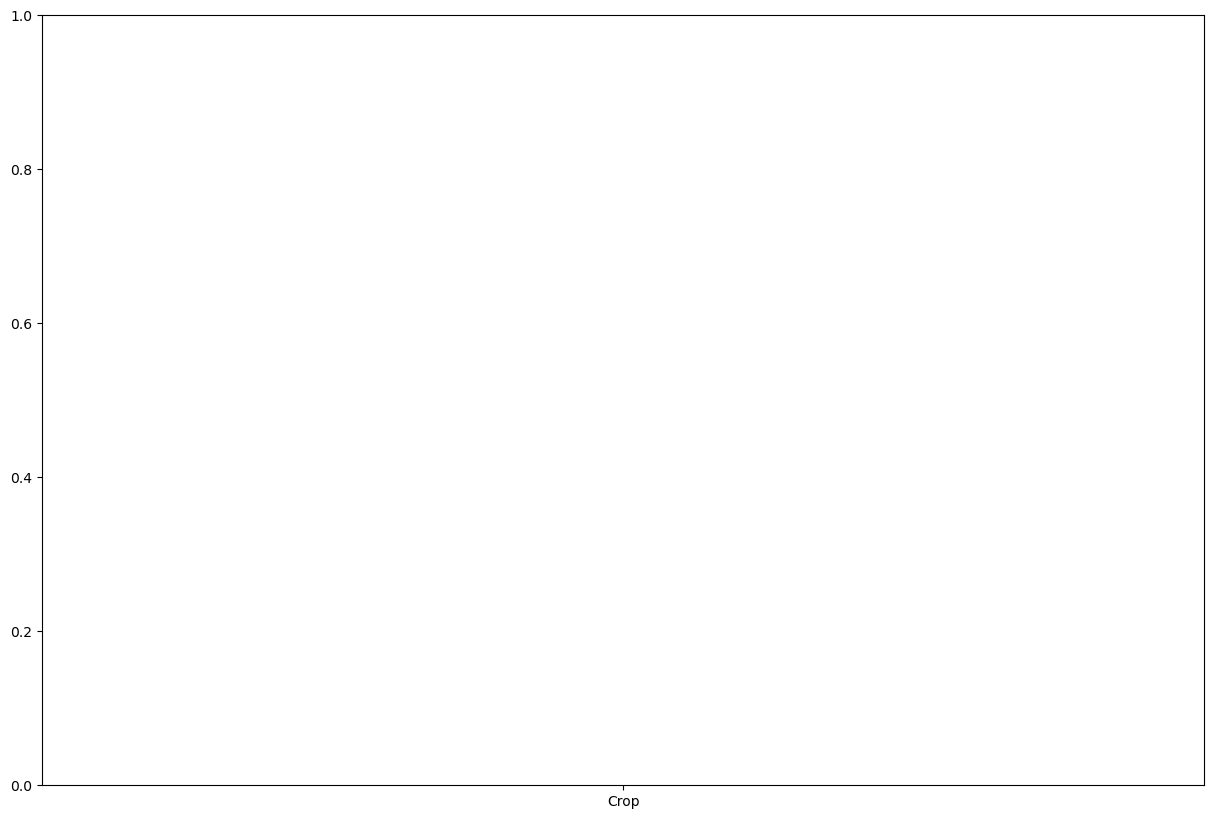

In [48]:
fig = plt.figure(figsize=(15,10))
t = "Sugarcane, Rice, and Wheat have 1/10th of actual values to make data relative and observable"
ax1 = fig.add_subplot(111)
colormap = plt.cm.nipy_spectral
ax1.set_prop_cycle(color=[colormap(i) for i in np.linspace(0, 1, crop_price.shape[0])])

for i in range(production_year.shape[0]):
    if production_year.iloc[i, 1] < 50000000:
        ax1.plot(production_year.columns[:production_year.shape[1]-1], production_year.iloc[i,:production_year.shape[1]-1])
    else:
        ax1.plot(production_year.columns[:production_year.shape[1]-1], production_year.iloc[i,:production_year.shape[1]-1]/10, linestyle='--')

plt.legend(production_year.iloc[:, production_year.shape[1]-1], bbox_to_anchor=(1.02,1), borderaxespad=0)
plt.text(0, 3.5*10000000, t, ha='left', va='top', rotation=0, wrap=True)
plt.title('Amount of production of major crops year wise')
plt.show()

In [49]:
ratio_prod_area = production_year.iloc[:,:area_price.shape[1]-1].reset_index(drop=True)/area_price.iloc[:,:area_price.shape[1]-1].reset_index(drop=True)
ratio_prod_area.index = area_price.index
ratio_prod_area=pd.concat([area_price.iloc[:,area_price.shape[1]-1],ratio_prod_area],axis=1)

ratio_prod_area_earn = ratio_prod_area.iloc[:,1:].reset_index(drop=True)*crop_price.iloc[:,1:].reset_index(drop=True)
ratio_prod_area_earn.index = area_price.index
ratio_prod_area_earn=pd.concat([area_price.iloc[:,area_price.shape[1]-1],ratio_prod_area_earn],axis=1)
ratio_prod_area_earn.head()

,Crop,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,Crop
114,Apple,5.948682e+08,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN
88,Arcanut (Processed),1.619122e+04,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN
0,Arecanut,3.667711e+03,2.252160e+03,1.753039e+03,1.822432e+03,2.175485e+03,3.002652e+03,2.556775e+03,3.302097e+03,1.850403e+03,NaN,NaN
13,Arhar/Tur,1.037056e+04,2.168349e+04,2.391835e+04,2.382374e+04,2.895140e+04,3.670619e+04,3.567779e+04,3.502579e+04,4.448147e+04,NaN,NaN
111,Ash Gourd,6.960880e+06,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN


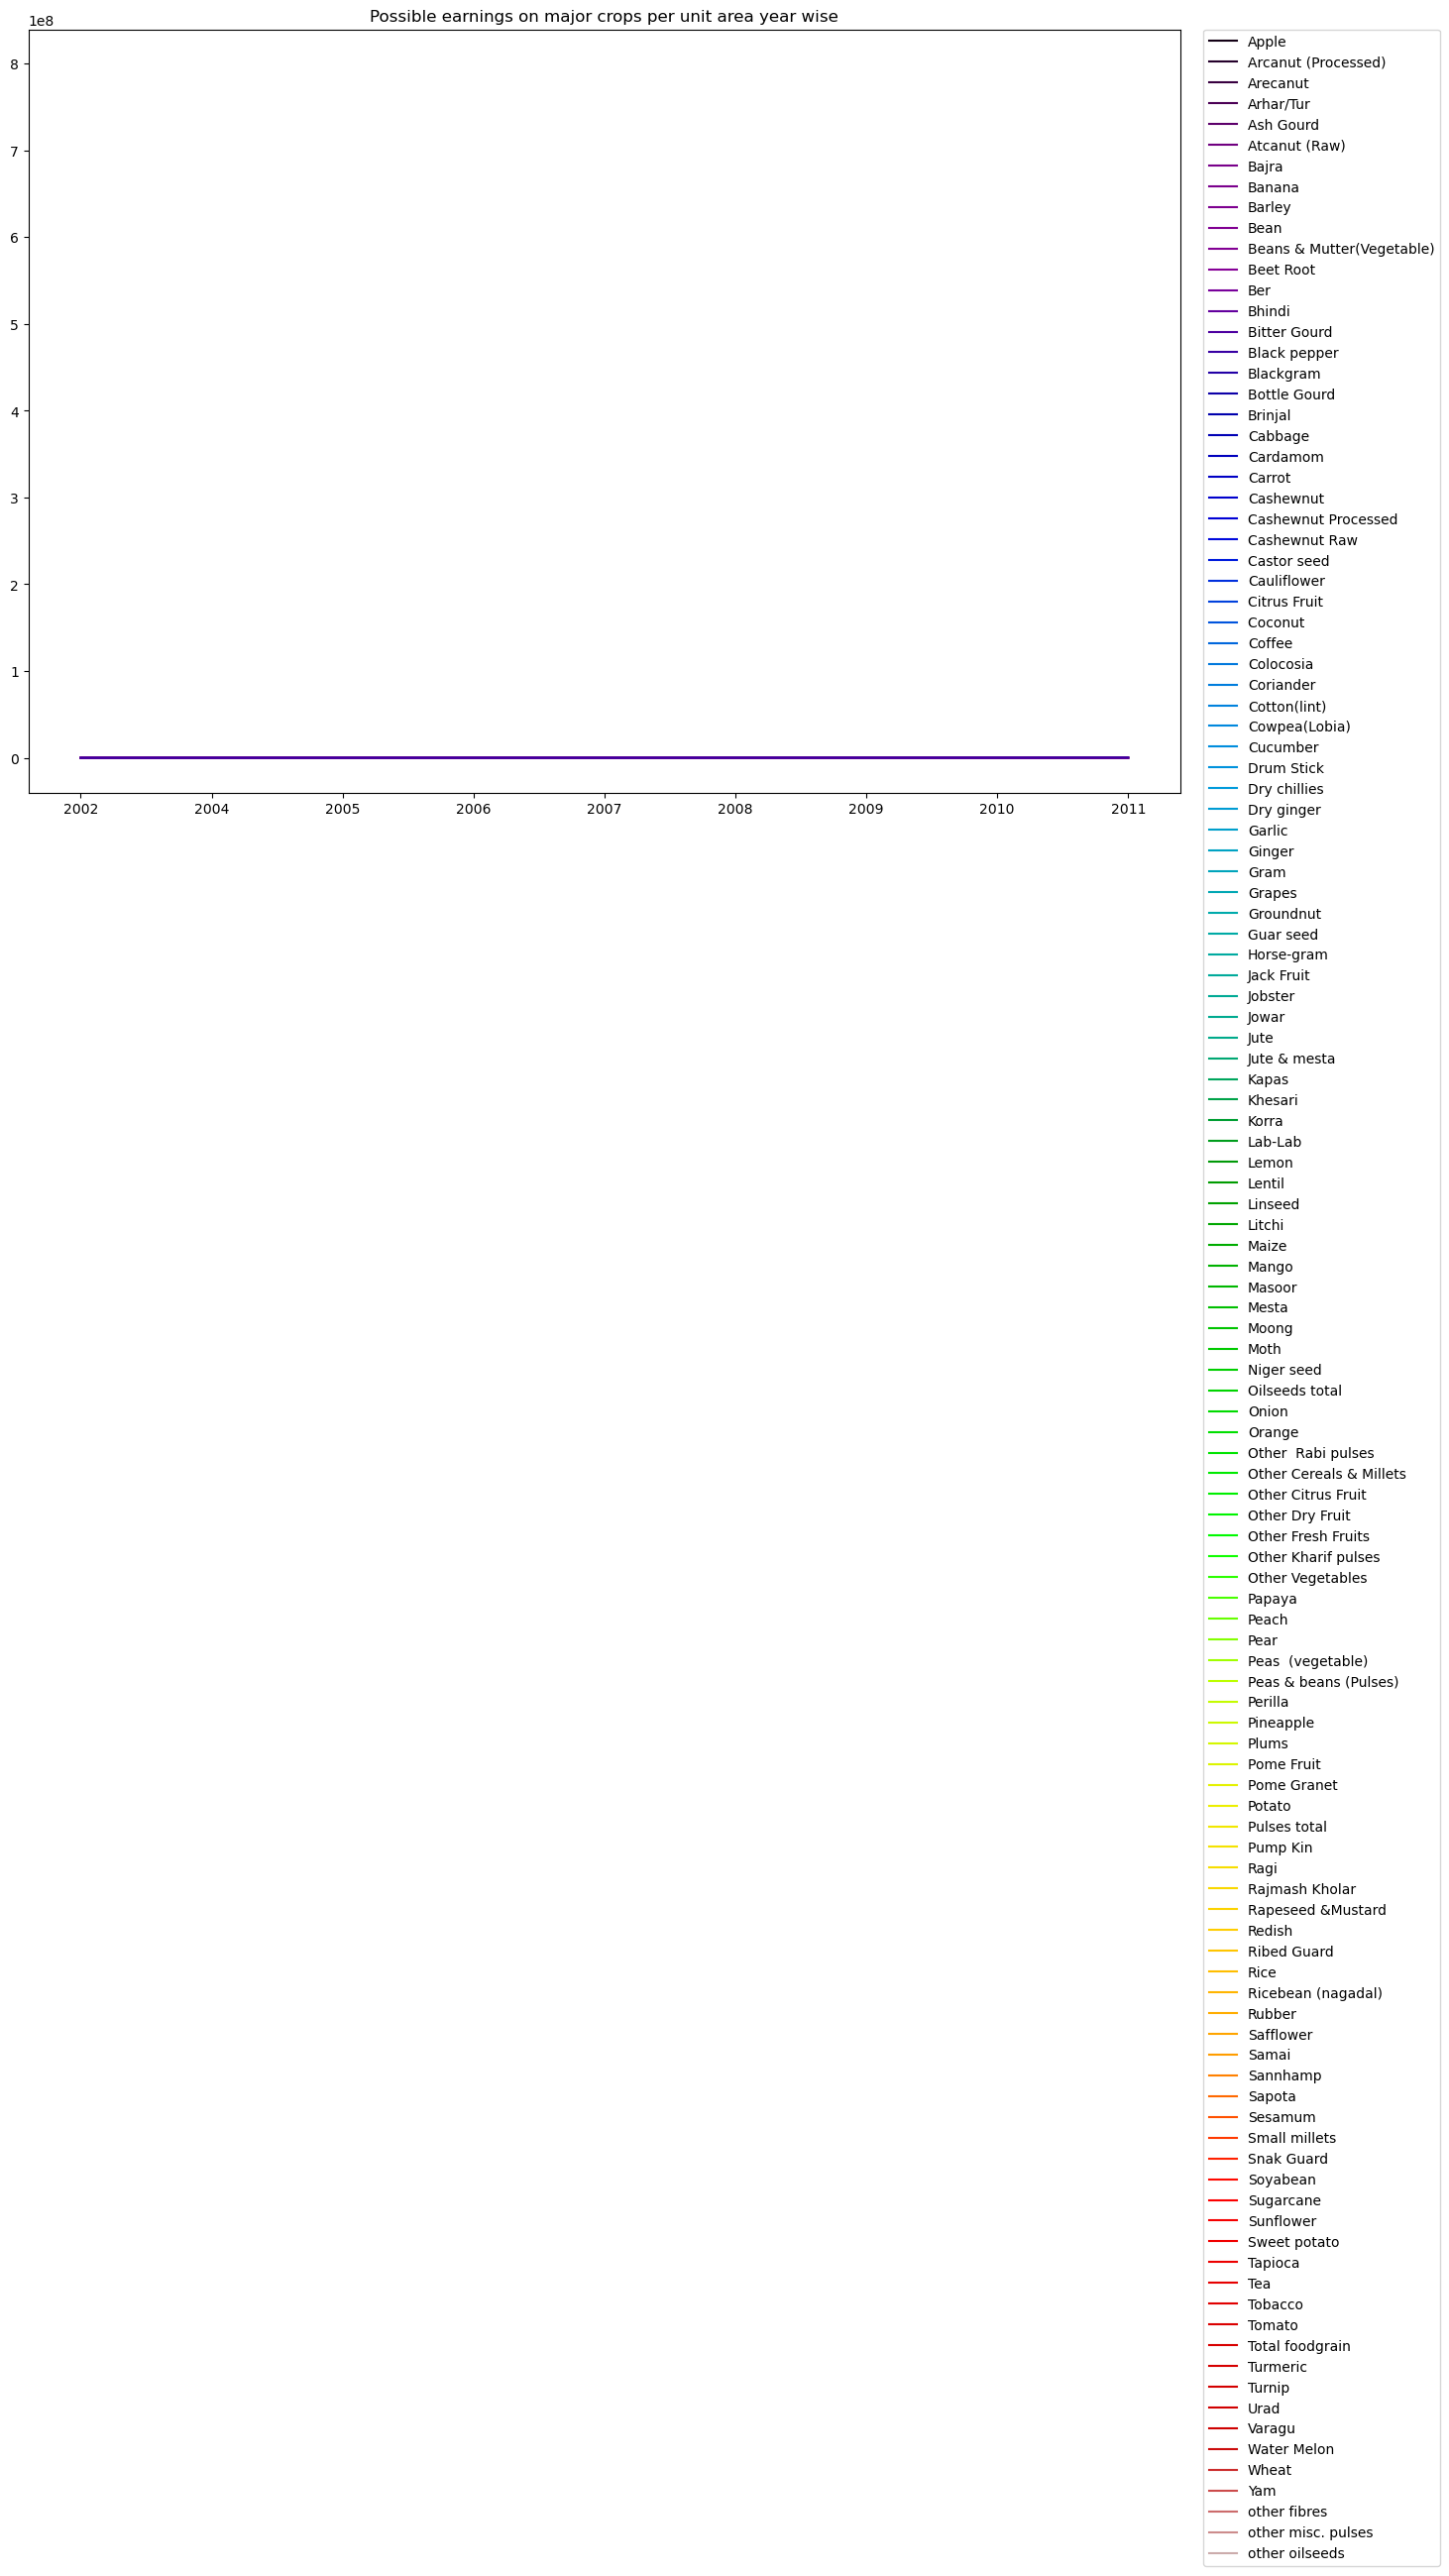

In [50]:
# Set the years to be plotted
years = ratio_prod_area_earn.columns[1:]

# Create a new figure
fig, ax = plt.subplots(figsize=(15, 10))

# Set the color palette
palette = sns.color_palette('nipy_spectral', n_colors=len(ratio_prod_area_earn))

# Plot the earnings for each crop
for i, row in enumerate(ratio_prod_area_earn.iterrows()):
    crop = row[1][0]
    earnings = row[1][1:]
    ax.plot(years, earnings, color=palette[i], label=crop)

# Set the legend and title
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
ax.set_title('Possible earnings on major crops per unit area year wise')

# Show the plot
plt.show()

In [51]:
# Select data from 2000 onwards and group by state, year, and crop
prod_rain = crop_prod[crop_prod['Crop_Year'] >= 2000].groupby(['State_Name', 'Crop_Year', 'Crop'], as_index=False, sort=False).sum()

# Clean up state names
prod_rain['State_Name'] = prod_rain['State_Name'].str.upper()
prod_rain['State_Name'].replace({
    'ANDAMAN AND NICOBAR ISLANDS': 'ANDAMAN & NICOBAR ISLANDS',
    'JAMMU AND KASHMIR ': 'JAMMU & KASHMIR',
    'ODISHA': 'ORISSA',
    'TELANGANA ': 'TELANGANA'
}, inplace=True)

# Remove unnecessary columns and group by state and year
prod_rain.drop(columns=['Crop', 'Production'], inplace=True)
prod_rain = prod_rain.groupby(['State_Name', 'Crop_Year'], as_index=False, sort=False).sum()


In [52]:
# Select relevant columns from the rainfall dataframe
temp_rain = rainfall.iloc[:,[0,1,-1]]

# Filter the prod_rain dataframe to only include states with rainfall data
prod_rain = prod_rain[prod_rain['State_Name'].isin(temp_rain['STATES'].unique())]

# Filter the rainfall dataframe to only include states with production data
temp_rain = temp_rain[temp_rain['STATES'].isin(prod_rain['State_Name'].unique())]

# Display the first 400 rows of the filtered rainfall dataframe
temp_rain.head(400)


,STATES,YEAR,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,2763.20
1,ANDAMAN & NICOBAR ISLANDS,2001,3080.90
2,ANDAMAN & NICOBAR ISLANDS,2002,2620.20
3,ANDAMAN & NICOBAR ISLANDS,2003,2355.90
4,ANDAMAN & NICOBAR ISLANDS,2004,2460.10
...,...,...,...
411,WEST BENGAL,2011,2052.60
412,WEST BENGAL,2012,1950.10
413,WEST BENGAL,2013,2085.10
414,WEST BENGAL,2014,1792.00


In [53]:
# Extract crop area data
area = crop_prod.loc[crop_prod['Crop_Year'] >= 2000].copy()
area = area.groupby(['State_Name', 'Crop_Year', 'Crop'], as_index=False, sort=False).sum()
area_temp = area.drop(columns='Crop')
area_temp = area_temp.groupby(['State_Name', 'Crop_Year'], as_index=False, sort=False).sum()

# Modify state names to match rainfall data
area_temp['State_Name'] = area_temp['State_Name'].str.upper()
area_temp['State_Name'] = area_temp['State_Name'].str.replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')
area_temp['State_Name'] = area_temp['State_Name'].str.replace('JAMMU AND KASHMIR ', 'JAMMU & KASHMIR')
area_temp['State_Name'] = area_temp['State_Name'].str.replace('ODISHA', 'ORISSA')
area_temp['State_Name'] = area_temp['State_Name'].str.replace('TELANGANA ', 'TELANGANA')

# Filter data to only include states that appear in both DataFrames
area_temp = area_temp[area_temp['State_Name'].isin(temp_rain['STATES'])]
temp_rain = temp_rain[temp_rain['STATES'].isin(area_temp['State_Name'])]

area_temp.head()


,State_Name,Crop_Year,Area,Production
0,ANDAMAN & NICOBAR ISLANDS,2000,44518.00,89060914.00
1,ANDAMAN & NICOBAR ISLANDS,2002,45231.40,94387137.67
2,ANDAMAN & NICOBAR ISLANDS,2003,44799.40,95296454.67
3,ANDAMAN & NICOBAR ISLANDS,2004,45308.77,87186497.63
4,ANDAMAN & NICOBAR ISLANDS,2010,41697.92,95055907.87


In [54]:
area_rainfall = pd.merge(area_temp.rename(columns={"State_Name": "STATES", "Crop_Year": "YEAR"}),temp_rain,how='inner')
area_rainfall.head()

,STATES,YEAR,Area,Production,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,44518.00,89060914.00,2763.2
1,ANDAMAN & NICOBAR ISLANDS,2002,45231.40,94387137.67,2620.2
2,ANDAMAN & NICOBAR ISLANDS,2003,44799.40,95296454.67,2355.9
3,ANDAMAN & NICOBAR ISLANDS,2004,45308.77,87186497.63,2460.1
4,ANDAMAN & NICOBAR ISLANDS,2010,41697.92,95055907.87,3157.1


In [55]:
suicides = suicides.rename(columns={'State/UT': 'STATES'})


In [56]:
# Select rows from area_rainfall where STATES is in suicides['STATES']
area_rainfall_plot = area_rainfall[area_rainfall['STATES'].isin(suicides['STATES'])]

# Drop rows with missing values
area_rainfall_plot = area_rainfall_plot.dropna()

# Select rows from suicides where STATES is in area_rainfall_plot['STATES']
suicides = suicides[suicides['STATES'].isin(area_rainfall_plot['STATES'])]

# Print the shape of area_rainfall_plot
print(area_rainfall_plot.shape)


(312, 5)


In [57]:
area_rainfall['Calc'] = (area_rainfall.Area*area_rainfall.ANNUAL)/area_rainfall.Production

In [59]:
area_rainfall = pd.merge(area_temp.rename(columns={"State_Name": "STATES", "Crop_Year": "YEAR"}),temp_rain,how='inner')
area_rain_no0=area_rainfall.copy()
# area_rain_no0.iloc[:,2:] = fill_0(area_rain_n0.iloc[:,2:])
area_rain_no0.head()


,STATES,YEAR,Area,Production,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,44518.00,89060914.00,2763.2
1,ANDAMAN & NICOBAR ISLANDS,2002,45231.40,94387137.67,2620.2
2,ANDAMAN & NICOBAR ISLANDS,2003,44799.40,95296454.67,2355.9
3,ANDAMAN & NICOBAR ISLANDS,2004,45308.77,87186497.63,2460.1
4,ANDAMAN & NICOBAR ISLANDS,2010,41697.92,95055907.87,3157.1


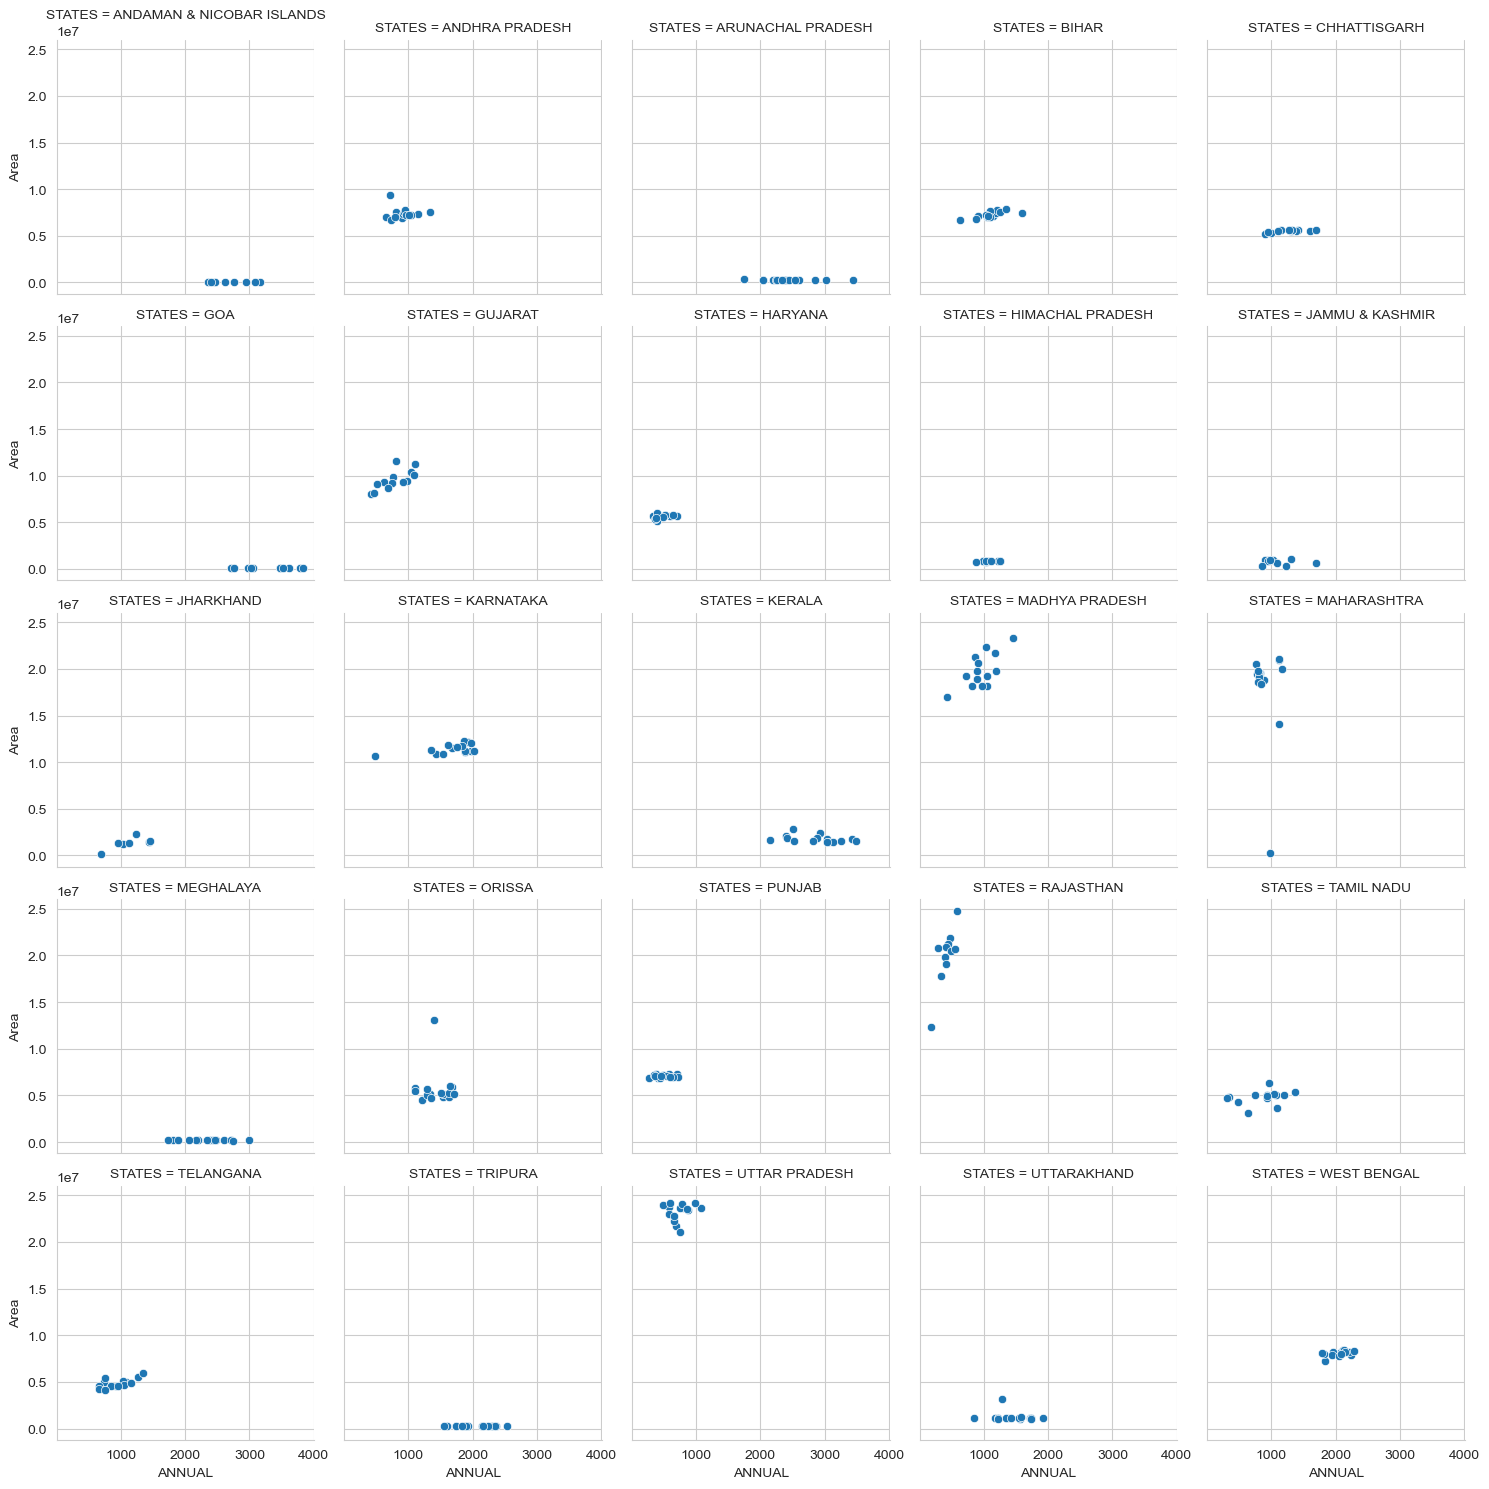

In [60]:
sns.set_style("whitegrid")
g = sns.FacetGrid(area_rain_no0, col="STATES", col_wrap=5, height=3)
g.map(sns.scatterplot, "ANNUAL", "Area")
plt.show()

In [61]:
area = crop_prod.copy()
area = area.loc[area.loc[:,'Crop_Year'] >=2000,:]
area = area.groupby(['Crop_Year','Crop'],as_index=False,sort=False).sum()
area_temp=area.copy()

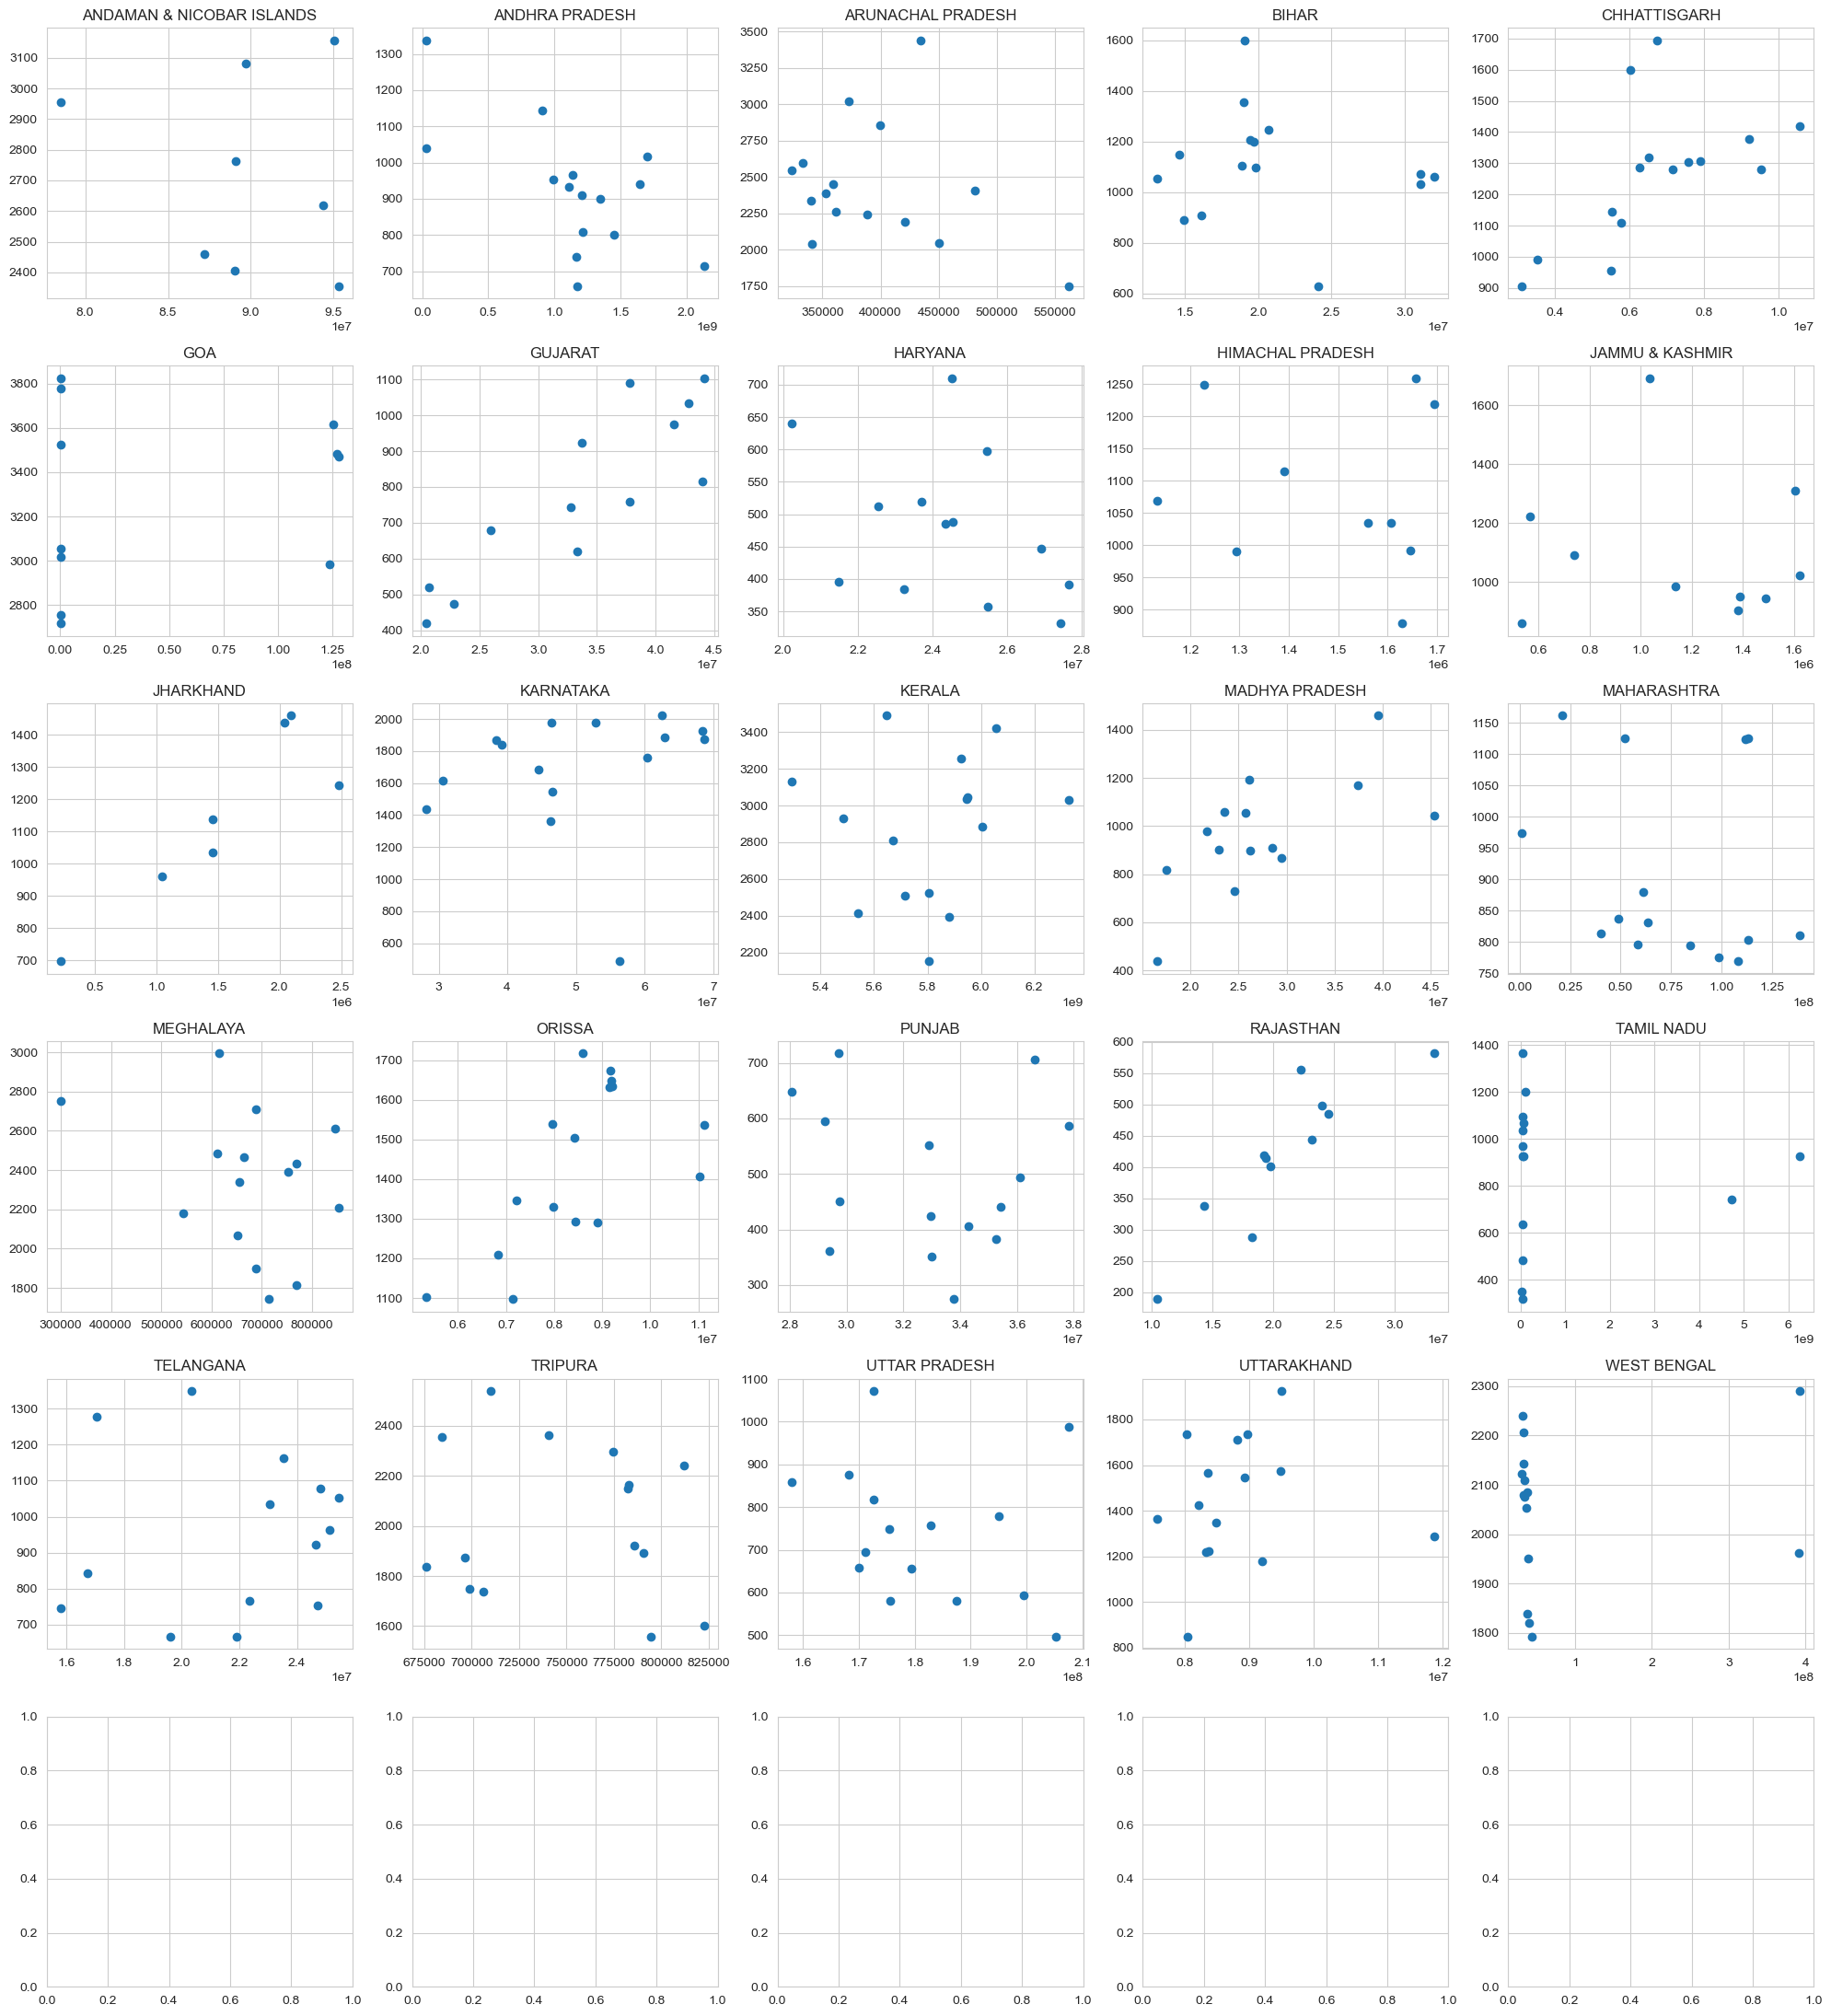

In [62]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20,22))

for i, state in enumerate(area_rain_no0.STATES.unique()):
    tp= area_rain_no0[area_rain_no0.STATES==state]
    tp=tp.iloc[:,2:]
    row, col = divmod(i, 5)
    ax[row, col].scatter(tp.iloc[:,1], tp.iloc[:,2])
    ax[row, col].set_title(state)

plt.tight_layout()
plt.show()

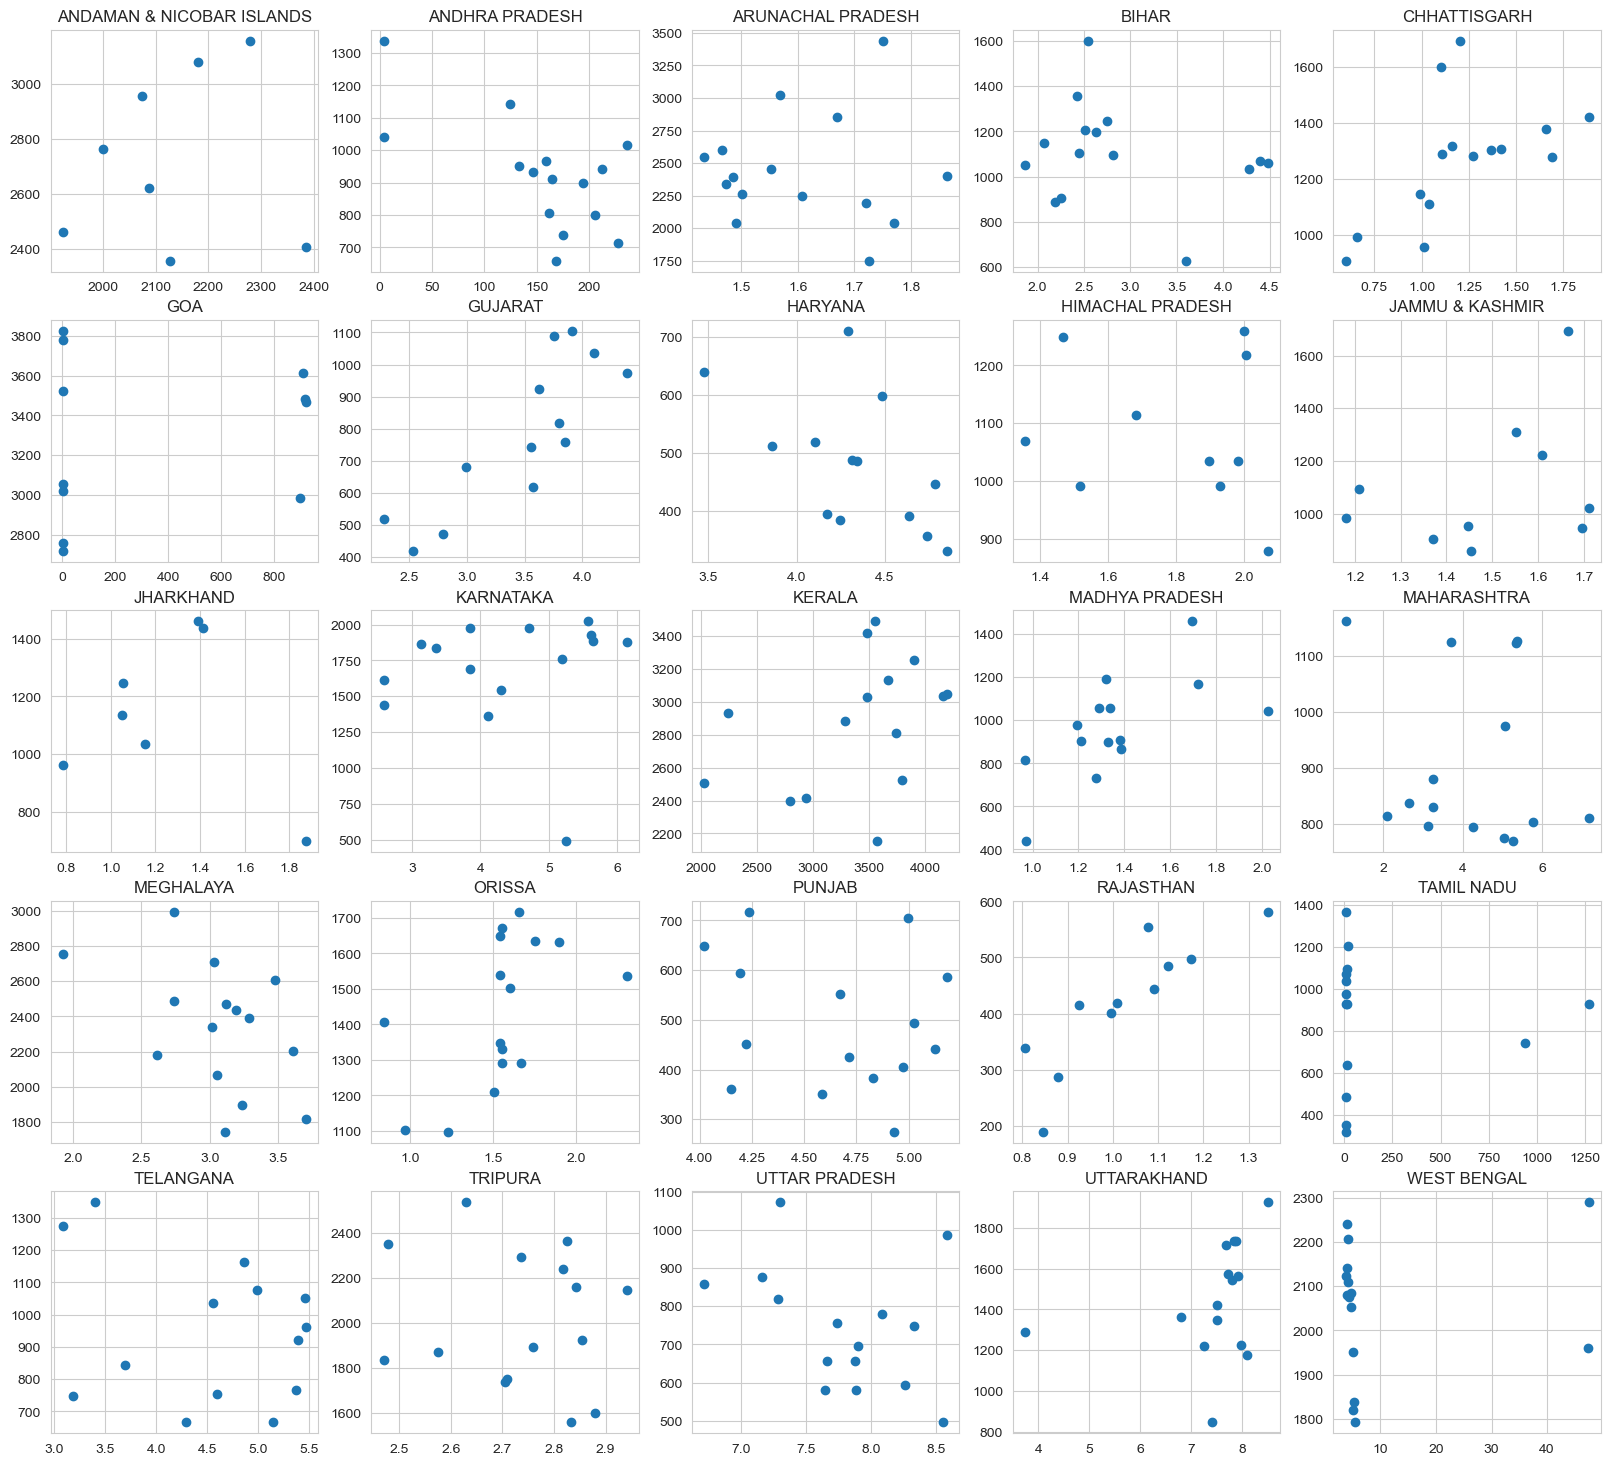

In [63]:
ct = 0
fig = mplot.figure(figsize=(20,22))
for i in area_rain_no0.STATES.unique():
    tp= area_rain_no0[area_rain_no0.STATES==i]
    tp=tp.iloc[:,2:]
    ct+=1
    mplot.subplot(6,5,ct)
    mplot.scatter(tp.iloc[:,1]/tp.iloc[:,0],tp.iloc[:,2])
    mplot.title(i)
mplot.show()


In [65]:
area = crop_prod.copy()
area = area.loc[area.loc[:,'Crop_Year'] >=2000,:]
area = area.groupby(['Crop_Year','Crop'],as_index=False,sort=False).sum()
area_temp=area.copy()


In [66]:
area_heat = pd.merge(area_temp.rename(columns={"Crop_Year": "YEAR"}), temperature.iloc[:, 0:2], how='inner', sort=False)
area_heat['Ratio'] = area_heat.Production / area_heat.Area


In [67]:
area = crop_prod.copy()
area = area.loc[area.loc[:,'Crop_Year'] >=2000,:]
area = area.groupby(['State_Name','Crop_Year','Crop'],as_index=False,sort=False).sum()
area_temp = area.copy()
area_temp.iloc[:,0] = area_temp.iloc[:,0].str.upper()
area_temp.State_Name[area_temp.State_Name == 'ANDAMAN AND NICOBAR ISLANDS'] = 'ANDAMAN & NICOBAR ISLANDS'
area_temp.State_Name[area_temp.State_Name == 'JAMMU AND KASHMIR '] = 'JAMMU & KASHMIR'
area_temp.State_Name[area_temp.State_Name == 'ODISHA'] = 'ORISSA'
area_temp.State_Name[area_temp.State_Name == 'TELANGANA '] = 'TELANGANA'
area_temp.Crop[area_temp.Crop == 'Paddy'] = 'Rice' 
area_temp.Crop[area_temp.Crop == 'Moong(Green Gram)'] = 'Moong'


In [68]:
temp_crop_price = crop_price.melt(id_vars=['Commodities'])
temp_crop_price['variable'] = temp_crop_price['variable'].astype(int)


In [69]:
temp_cost = pd.concat([culti_cost.iloc[:, 0:2], culti_cost.iloc[:, 8:14]], axis=1)
years = temp_cost.columns[2:]
temp_cost.columns = list(temp_cost.columns[:2]) + list([year[len(year)-7:len(year)-3] for year in years])
temp_cost = temp_cost.melt(id_vars=['Crop', 'State/ UT Name'])
temp_cost.Crop[temp_cost.Crop == 'Paddy'] = 'Rice'
temp_cost.Crop[temp_cost.Crop == 'Arhar'] = 'Arhar/Tur'
temp_cost.Crop[temp_cost.Crop == 'Cotton'] = 'Cotton(lint)'
temp_cost.Crop[temp_cost.Crop == 'Rapeseed And Mustard'] = 'Rapeseed'
temp_cost.rename(columns={'State/ UT Name': 'STATES'}, inplace=True)
temp_cost.STATES = temp_cost.STATES.str.upper()
temp_cost.STATES[temp_cost.STATES == 'ODISHA'] = 'ORISSA'
temp_cost.variable = temp_cost.variable.astype(int)


In [70]:
# Extract columns 0-1 and 14-18 and create a new dataframe
temp_cost1 = pd.concat([culti_cost.iloc[:,0:2],culti_cost.iloc[:,14:19]], axis=1)

# Extract the year values from column names and assign them as column names
years = [year[-7:-3] for year in temp_cost1.columns[2:]]
temp_cost1.columns = list(temp_cost1.columns[:2]) + years

# Reshape the dataframe by melting it
temp_cost1 = temp_cost1.melt(id_vars=['Crop', 'State/ UT Name'], var_name='Year', value_name='Cost')

# Replace some Crop names with new names
temp_cost1['Crop'].replace({'Paddy': 'Rice', 'Arhar': 'Arhar/Tur', 'Cotton': 'Cotton(lint)', 'Rapeseed And Mustard': 'Rapeseed'}, inplace=True)

# Rename 'State/ UT Name' to 'STATES'
temp_cost1.rename(columns={'State/ UT Name':'STATES'}, inplace=True)

# Convert 'STATES' values to uppercase
temp_cost1['STATES'] = temp_cost1['STATES'].str.upper()

# Replace 'ODISHA' with 'ORISSA'
temp_cost1['STATES'].replace({'ODISHA': 'ORISSA'}, inplace=True)

# Convert 'Year' column to integer
temp_cost1['Year'] = temp_cost1['Year'].astype(int)


In [71]:
# Copy the suicides dataframe to a new variable
temp_sui = suicides.copy()

# Reshape the dataframe using melt
temp_sui = pd.melt(temp_sui, id_vars='STATES', var_name='Year', value_name='Suicides')

# Convert the 'Year' column to integer
temp_sui['Year'] = temp_sui['Year'].astype(int)


In [75]:
#reading all the merged data
merged_all=pd.merge(area_temp.rename(columns={'State_Name':'STATES','Crop_Year':'YEAR' }),temp_rain.rename(columns={'ANNUAL':'Annual_Rain'}),how='left')
merged_all=pd.merge(merged_all,temperature.iloc[:,0:2].rename(columns={'ANNUAL':'Avg_Temperature'}),how='left')
merged_all=pd.merge(merged_all,temp_crop_price.rename(columns={'Commodities':'Crop','variable':'YEAR','value':'Price'}),how='left')
merged_all=pd.merge(merged_all,temp_cost.rename(columns={'variable':'YEAR','value':'Cost_per_Hectare'}),how='left')
merged_all=pd.merge(merged_all,temp_cost1.rename(columns={'variable':'YEAR','value':'Cost_per_quintal'}),how='left')
merged_all = pd.merge(merged_all,temp_sui.rename(columns={'variable':'YEAR','value':'Suicides'}),how='left')
merged_all = pd.merge(merged_all,exports.rename(columns = {'Product':'Crop','variable':'YEAR','value':'Export'}),how='left')
merged_all.head(20)


,STATES,YEAR,Crop,Area,Production,Annual_Rain,Avg_Temperature,Price,Cost_per_Hectare,Year,Cost,Suicides,Export
0,ANDAMAN & NICOBAR ISLANDS,2000,Arecanut,4354.00,7200.00,2763.2,24.60,NaN,NaN,NaN,NaN,NaN,NaN
1,ANDAMAN & NICOBAR ISLANDS,2002,Arecanut,4363.00,7350.00,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
2,ANDAMAN & NICOBAR ISLANDS,2002,Banana,1737.00,12160.00,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
3,ANDAMAN & NICOBAR ISLANDS,2002,Black pepper,550.00,116.00,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDAMAN & NICOBAR ISLANDS,2002,Cashewnut,800.00,232.00,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
5,ANDAMAN & NICOBAR ISLANDS,2002,Coconut,25300.00,94320000.00,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
6,ANDAMAN & NICOBAR ISLANDS,2002,Dry chillies,652.00,49.70,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
7,ANDAMAN & NICOBAR ISLANDS,2002,Dry ginger,399.30,1278.00,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
8,ANDAMAN & NICOBAR ISLANDS,2002,other oilseeds,85.10,40.31,2620.2,25.00,NaN,NaN,NaN,NaN,NaN,NaN
9,ANDAMAN & NICOBAR ISLANDS,2002,Sugarcane,460.00,13800.00,2620.2,25.00,69.5,NaN,NaN,NaN,NaN,NaN


In [ ]:
scat_plot = scatter_matrix(merged_all, alpha=0.5, figsize=(18, 18))
plt.show()

In [ ]:
merged_all = merged_all.fillna(0)
merged_all.shape